In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg
import plotly.express as px
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Afnan\Downloads\response_dataset.csv")

In [4]:
df.head()

Time_submitted Student_age  Student_level Student_gender  \
0  4/27/2023 15:25          21              3           Male   
1  4/27/2023 15:28          20              2         Female   
2  4/27/2023 15:30          19              2           Male   
3  4/27/2023 15:31          20              2           Male   
4  4/27/2023 15:33          21              3         Female   

                  Fields_interested_in Helps_the_most High_in_demand_language  \
0         Data science;Web Development         Python                  Python   
1                      AI;Data science         Python                  Python   
2         Data science;Web Development         Python                  Python   
3  Mobile Applications;AI;Data science         Python                  Python   
4     Mobile Applications;Data science           Java                  Python   

  Prefer_to_use_familiar_language  Familiarity_with_Python  \
0                             Yes                        5   
1                             Yes                        5   
2                             Yes                        4   
3                             Yes                        4   
4                             Yes                        5   

   Familiarity_with_R  ...  Best_community_support_and_resources  \
0                   3  ...                                Python   
1                   4  ...                                Python   
2                   2  ...                                Python   
3                   2  ...                                Python   
4                   4  ...                                Python   

   How_easy_learning_Python How_easy_learning_R How_easy_learning_Java  \
0                         5                   3                      2   
1                         5                   4                      3   
2                         4                   2                      3   
3                         4                   2                      5   
4                         5                   3                      4   

                                   Python_usage Python_learning_resources  \
0               Data analysis and visualization       Python.org;Coursera   
1  Machine learning and artificial intelligence       Codecademy;Coursera   
2               Data analysis and visualization          Coursera;YouTube   
3  Machine learning and artificial intelligence   edX;Python.org;Coursera   
4  Machine learning and artificial intelligence             Python.org;W3   

           Java_usage             Java_learning_resources  \
0                 OOP           Online communities;Oracle   
1                GUIs               Udemy;Oracle;Coursera   
2  Mobile development                       Udemy;YouTube   
3                 OOP  Online communities;Oracle;Coursera   
4  Mobile development                             YouTube   

                           R_usage         R_learning_resources  
0             Statistical analysis                      YouTube  
1             Statistical analysis  Coursera;Online communities  
2             Statistical analysis   YouTube;Online communities  
3  Data analysis and visualization   YouTube;Online communities  
4  Data analysis and visualization              R documentation  

[5 rows x 33 columns]

In [5]:
df.drop(columns=["Time_submitted"],inplace = True)

In [6]:
df.describe()

Student_level  Familiarity_with_Python  Familiarity_with_R  \
count     223.000000               223.000000          223.000000   
mean        2.147982                 3.573991            2.650224   
std         0.849262                 1.274365            1.128496   
min         1.000000                 1.000000            1.000000   
25%         2.000000                 3.000000            2.000000   
50%         2.000000                 4.000000            3.000000   
75%         2.000000                 5.000000            3.000000   
max         4.000000                 5.000000            5.000000   

       Familiarity_with_Java  Importance_degree_of_knowing_multiple_languages  \
count             223.000000                                       223.000000   
mean                3.349776                                         3.627803   
std                 1.104286                                         1.069873   
min                 1.000000                                         1.000000   
25%                 3.000000                                         3.000000   
50%                 3.000000                                         4.000000   
75%                 4.000000                                         4.500000   
max                 5.000000                                         5.000000   

       Do_language_features_influence_you  How_easy_learning_Python  \
count                          223.000000                223.000000   
mean                             3.816143                  3.860987   
std                              0.863321                  1.010509   
min                              1.000000                  1.000000   
25%                              3.000000                  3.000000   
50%                              4.000000                  4.000000   
75%                              4.000000                  5.000000   
max                              5.000000                  5.000000   

       How_easy_learning_R  How_easy_learning_Java  
count           223.000000              223.000000  
mean              3.147982                3.089686  
std               1.082449                1.031500  
min               1.000000                1.000000  
25%               2.000000                2.000000  
50%               3.000000                3.000000  
75%               4.000000                4.000000  
max               5.000000                5.000000

In [7]:
def plot_bar(data, x_label, y_label, title, sort=True,hue=None):
    """
        Function for ploting barplot
    """
    if sort:
        order=data.sort_values(ascending=False).index
    else:
        order=None
    plt.figure(figsize=(15,6))
    ax =sns.barplot(x=data.index, y=data.values, palette='rocket', order=order, hue=hue)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(x_label, fontsize=15, fontweight='bold')
    plt.ylabel(y_label, fontsize=15, fontweight='bold')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 7), 
                    textcoords = 'offset points')

## 1.Which language is preferred by the students?

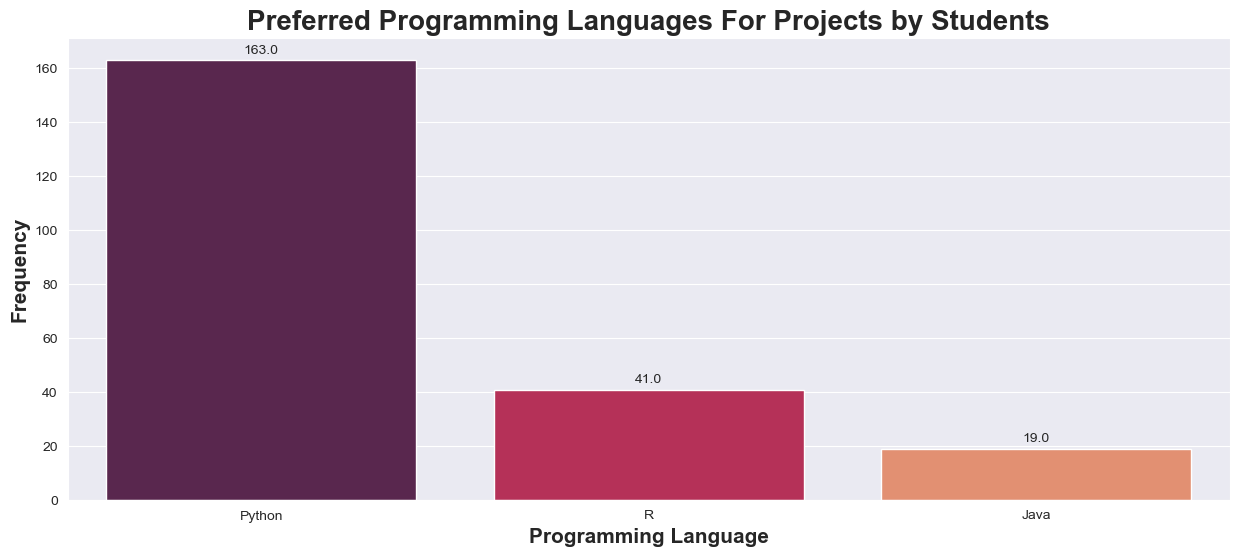

In [8]:
pref_lang = df['Preferred_language_for_projects'].value_counts()
plot_bar(data=pref_lang, x_label='Programming Language',
         y_label='Frequency', title='Preferred Programming Languages For Projects by Students')

## 2.Which language is most used by students depending on their specification?

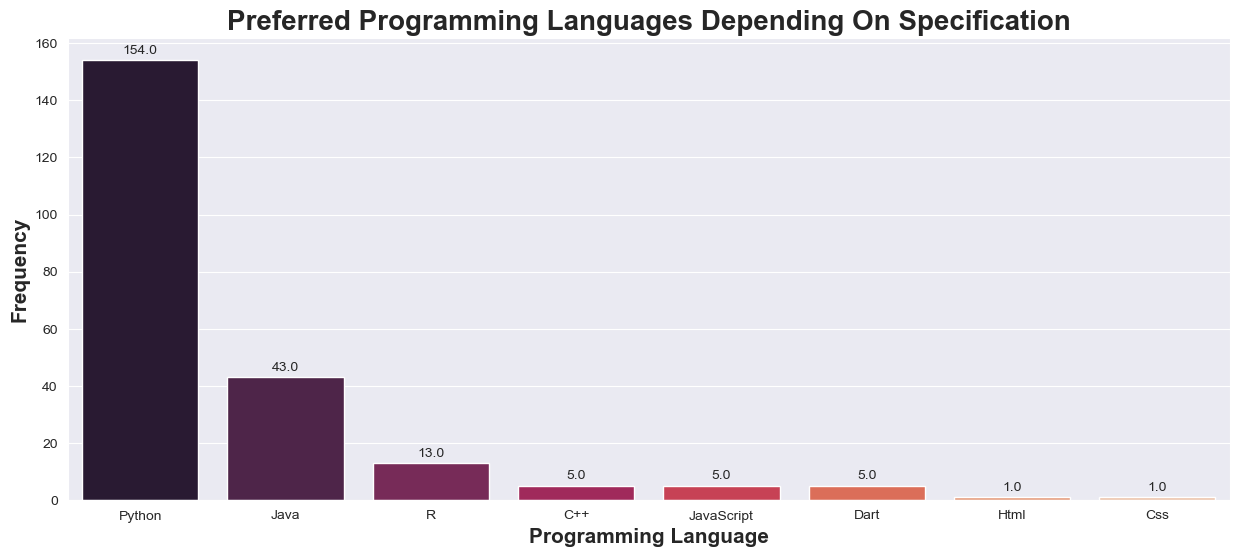

In [9]:
language_used = df['Helps_the_most'].str.split(';').explode()
most_used_lang_spec = language_used.value_counts()
plot_bar(data=most_used_lang_spec, x_label='Programming Language',
         y_label = 'Frequency', title='Preferred Programming Languages Depending On Specification')

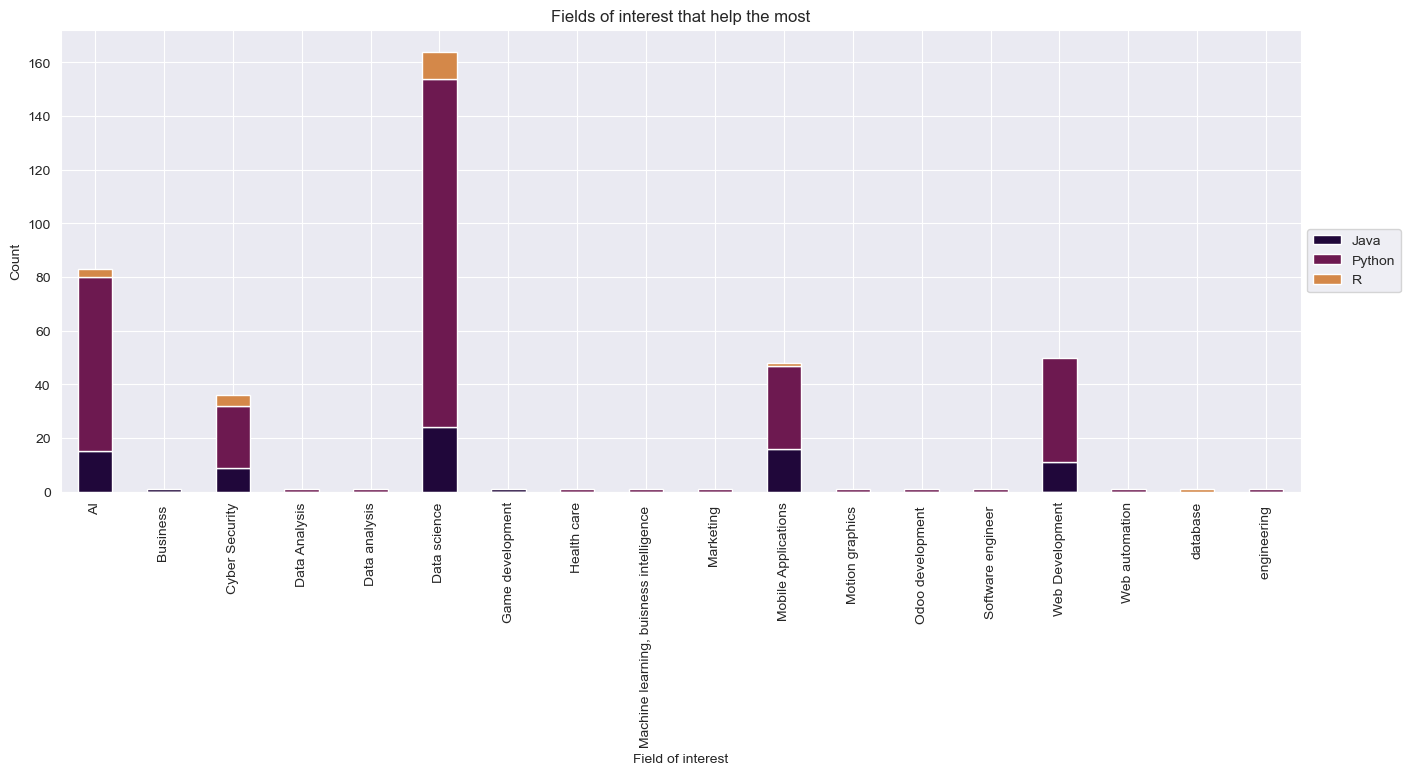

In [10]:
# Create a new dataframe with the relevant columns
new_df = df[['Fields_interested_in', 'Helps_the_most']]

# Split the Fields_interested_in column into separate fields
fields = new_df['Fields_interested_in'].str.split(';').explode()

# Combine the fields and Helps_the_most columns
combined_df = pd.concat([fields, new_df['Helps_the_most']], axis=1)

combined_df = combined_df[combined_df['Helps_the_most'].isin(['Java', 'Python', 'R'])]

# Create a pivot table to count the occurrences of each field of interest and Helps_the_most value
pivot_df = combined_df.pivot_table(index='Fields_interested_in', columns='Helps_the_most', aggfunc=len)

# Create a stacked bar chart to visualize the results
new_colors=[ '#20073a','#6d1950','#d48849','#f0d171']
ax = pivot_df.plot(kind='bar', stacked=True, color=new_colors, figsize=(16,6))

# Set the chart title and axis labels
ax.set_title('Fields of interest that help the most')
ax.set_xlabel('Field of interest')
ax.set_ylabel('Count')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the chart
plt.show()

In [11]:
# Create a new dataframe with the relevant columns
new_df = df[['Fields_interested_in', 'Helps_the_most']]

# Split the Fields_interested_in column into separate fields
fields = new_df['Fields_interested_in'].str.split(';').explode()

# Combine the fields and Helps_the_most columns
combined_df = pd.concat([fields, new_df['Helps_the_most']], axis=1)

# Create a cross-tabulation of the counts for Fields_interested_in and Helps_the_most
cross_tab = pd.crosstab(combined_df['Fields_interested_in'], combined_df['Helps_the_most'])
cross_tab

Helps_the_most                            C++  Dart  Dart;Python  \
Fields_interested_in                                               
AI                                          1     1            0   
Algorithms                                  1     0            0   
Business                                    0     0            0   
Cyber Security                              0     0            0   
Data Analysis                               0     0            0   
Data analysis                               0     0            0   
Data analysis                               1     0            0   
Data science                                2     0            1   
Game development                            0     0            0   
Health care                                 0     0            0   
Machine learning, buisness intelligence     0     0            0   
Marketing                                   0     0            0   
Mobile Applications                         1     4            1   
Motion graphics                             0     0            0   
Odoo development                            0     0            0   
Software engineer                           0     0            0   
Web Development                             1     1            0   
Web automation                              0     0            0   
database                                    0     0            0   
engineering                                 0     0            0   

Helps_the_most                            Html;Css;JavaScript  Java  \
Fields_interested_in                                                  
AI                                                          0    15   
Algorithms                                                  0     0   
Business                                                    0     1   
Cyber Security                                              0     9   
Data Analysis                                               0     0   
Data analysis                                               0     0   
Data analysis                                               0     0   
Data science                                                0    24   
Game development                                            0     1   
Health care                                                 0     0   
Machine learning, buisness intelligence                     0     0   
Marketing                                                   0     0   
Mobile Applications                                         0    16   
Motion graphics                                             0     0   
Odoo development                                            0     0   
Software engineer                                           0     0   
Web Development                                             1    11   
Web automation                                              0     0   
database                                                    0     0   
engineering                                                 0     0   

Helps_the_most                            JavaScript  Python  Python;Java   R  
Fields_interested_in                                                           
AI                                                 0      65            1   3  
Algorithms                                         0       0            0   0  
Business                                           0       0            0   0  
Cyber Security                                     0      23            0   4  
Data Analysis                                      0       1            0   0  
Data analysis                                      0       1            0   0  
Data analysis                                      0       0            0   0  
Data science                                       1     130            0  10  
Game development                                   0       0            0   0  
Health care                                        0       1

## 3.What are the functionalities that affect their choice?

In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// to stop auto scroll in output

<IPython.core.display.Javascript object>

In [13]:
# ----uncomment this when you want run the notebook for the first time then comment them back.

grouped_df = df.groupby('Language_used')

# Iterate over the groups and print the group name and size
for name, group in grouped_df:
    # Concatenate all the strings in the 'why' column for the current group
    text = group['and_why'].str.cat(sep=' ')
    
    # Create a WordCloud object with the desired parameters
    try:
        wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='magma', max_words=200).generate(text)
    except:
        pass

    # Create the plot for the current group
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for ' + name, fontsize=16)
    plt.savefig(name + '.png')
    plt.close()

files = glob.glob('*.png')

n_rows = (len(files) + 1) // 2
n_cols = min(len(files), 2)
# Create a grid of subplots and display the plots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(50,200))
fig.suptitle('Students Reasons For Choosing A Particular Language ', fontsize=100, fontweight='bold')
for i, file in enumerate(files):
    img = mpimg.imread(file)
    row = i // 2
    col = i % 2
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(file, fontsize=16)
plt.show();

>**observations:**
>some of functionalities that effect students choice :<br>
> - **Java**: familiar,required,mobile development,potentials<br>
> - **Python**: easy,efficient,analysis,availability of libraries<br>
> - **R**: statistics,required,analysis,suitable

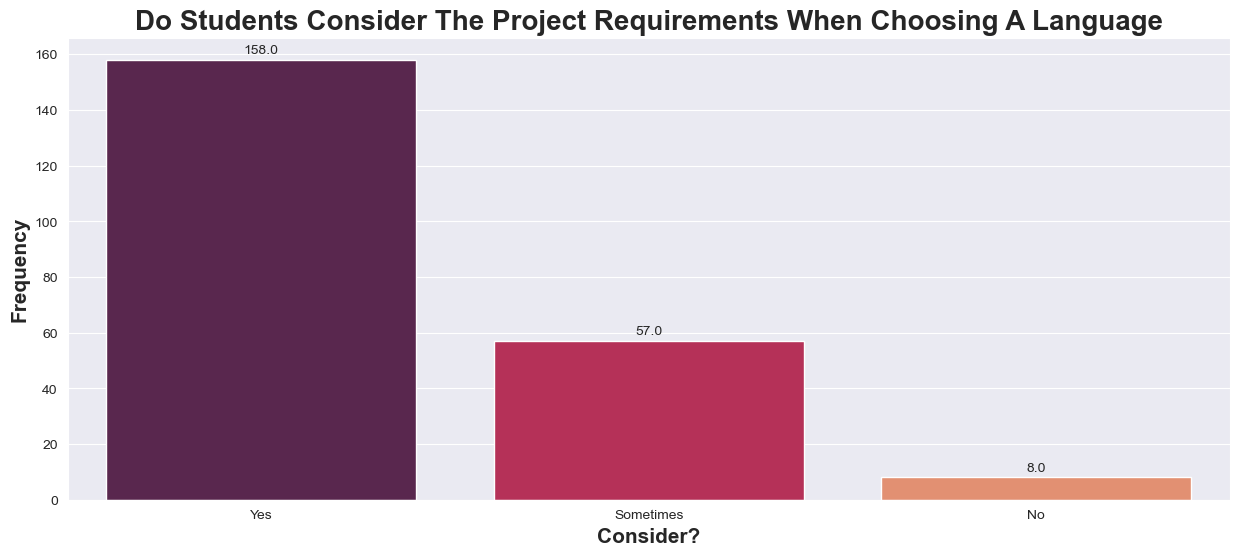

In [14]:
consider_req = df['Consider_requirements_when_choosing_a_language'].value_counts()
plot_bar(data=consider_req, x_label= 'Consider?', y_label='Frequency', 
         title='Do Students Consider The Project Requirements When Choosing A Language')

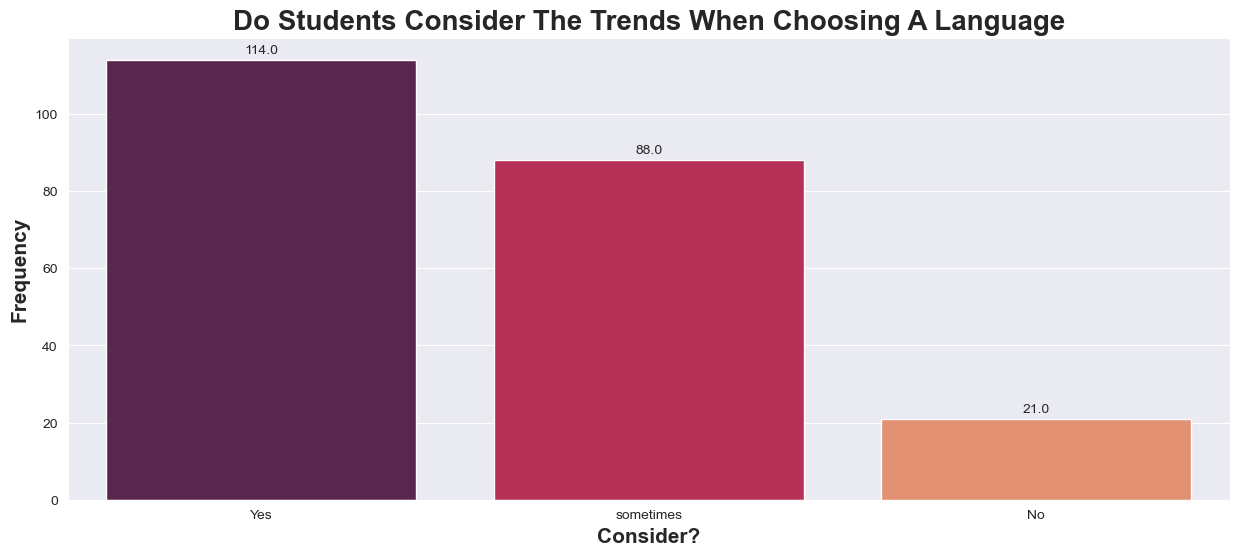

In [15]:
consider_trend = df['Consider_trends_when_choosing_a_language'].value_counts()
plot_bar(data=consider_trend, x_label= 'Consider?', y_label='Frequency', 
         title='Do Students Consider The Trends When Choosing A Language')

## 4.How do students find the ease of learning and using each language?

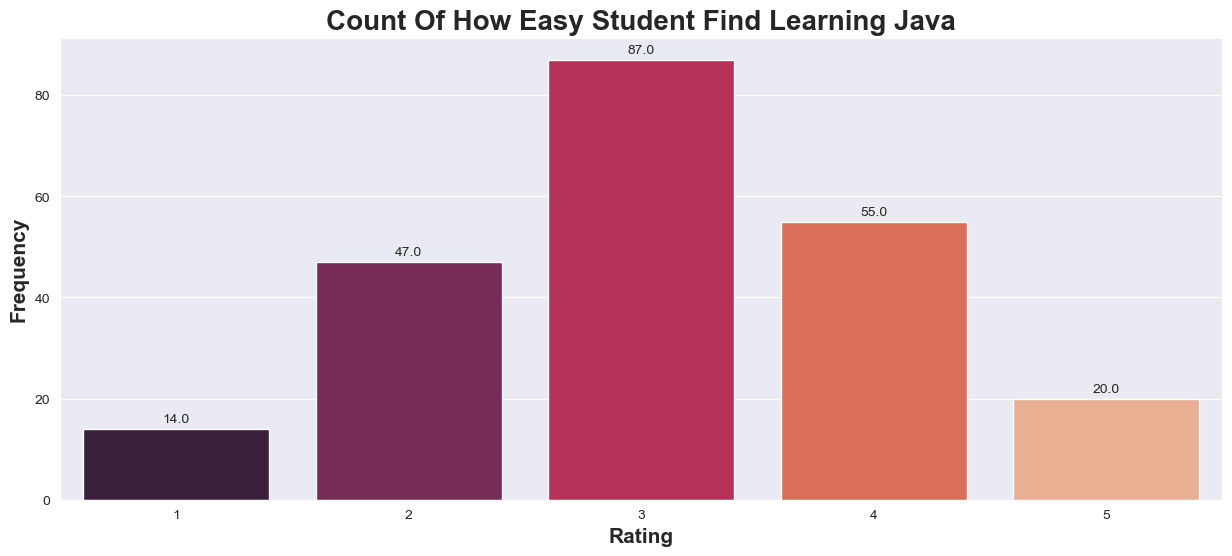

In [16]:
ease_java = df['How_easy_learning_Java'].value_counts()
plot_bar(data=ease_java, x_label= 'Rating', y_label='Frequency', 
         title='Count Of How Easy Student Find Learning Java', sort=False)

> **observations:**
only 33% of the respondents found the Java programming language easy to learn.

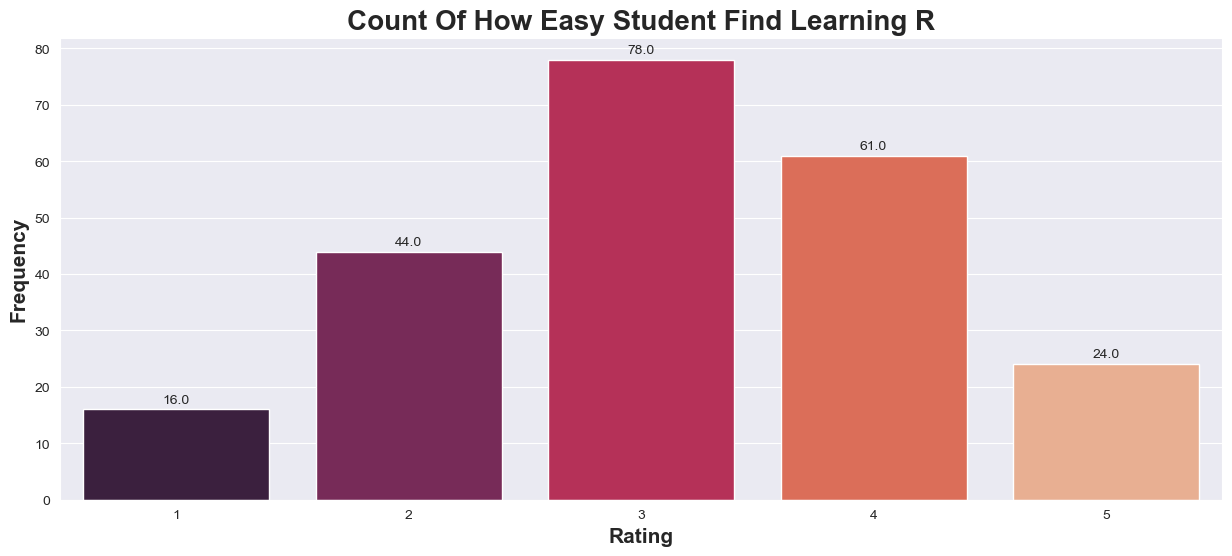

In [17]:
ease_R = df['How_easy_learning_R'].value_counts()
plot_bar(data=ease_R, x_label= 'Rating', y_label='Frequency', 
         title='Count Of How Easy Student Find Learning R', sort=False)

> **observations:**
students have mixed opinions about the ease of learning R, with 38% finding it easy and 26% finding it hard.

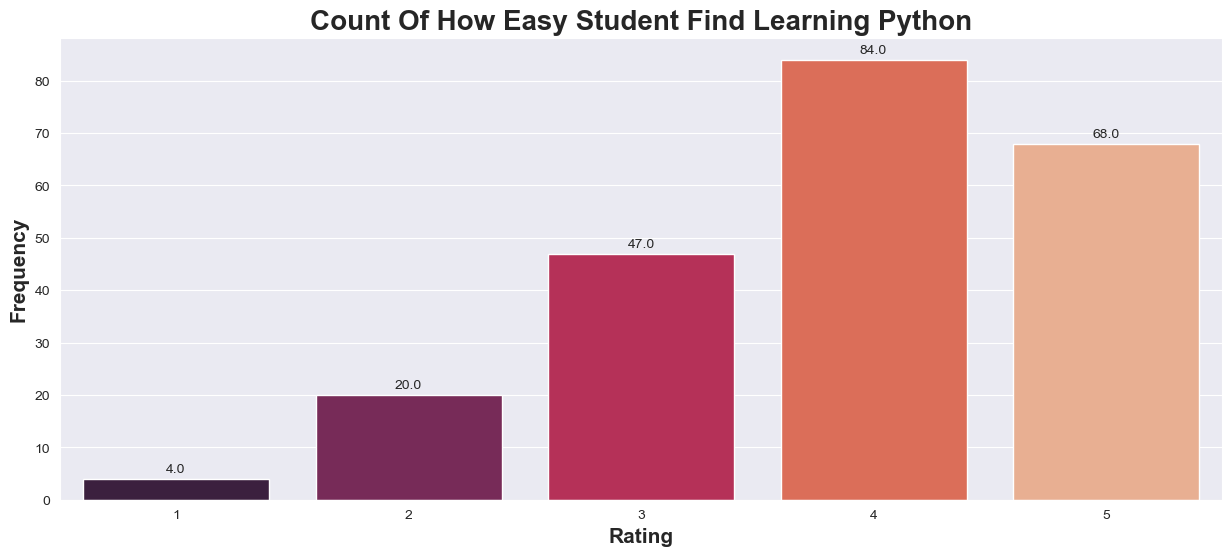

In [18]:
ease_python= df['How_easy_learning_Python'].value_counts()
plot_bar(data=ease_python, x_label= 'Rating', y_label='Frequency', 
         title='Count Of How Easy Student Find Learning Python', sort=False)

> **observations:**
The majority of students, approximately 68%, found the Python programming language easy to learn.

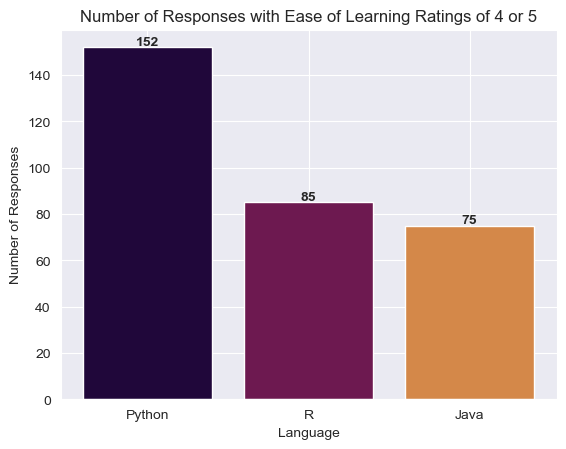

In [19]:
# Create a dictionary to store the counts for each column
counts = {
    'Java': df[df['How_easy_learning_Java'].isin([4, 5])]['How_easy_learning_Java'].count(),
    'Python': df[df['How_easy_learning_Python'].isin([4, 5])]['How_easy_learning_Python'].count(),
    'R': df[df['How_easy_learning_R'].isin([4, 5])]['How_easy_learning_R'].count()
}

# Convert the dictionary to a dataframe and sort by the 'Count' column
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)


# Create a bar chart with colored bars
plt.bar(df_counts.index, df_counts['Count'], color=new_colors)

# Set the chart title and axis labels
plt.title('Number of Responses with Ease of Learning Ratings of 4 or 5')
plt.xlabel('Language')
plt.ylabel('Number of Responses')

# Add text labels to the bars
for i, v in enumerate(df_counts['Count']):
    plt.text(i, v+1, str(v), ha='center', fontweight='bold')

# Show the chart
plt.show()

> **observation:**<br>
    most students finds that python to be an easy programming language to learn.<br>
    Java and R are considered to be less easy to learn.<br>
    considering that R is still not a commonly used among students.

## which resources or tools the students find most helpful for learning each language?

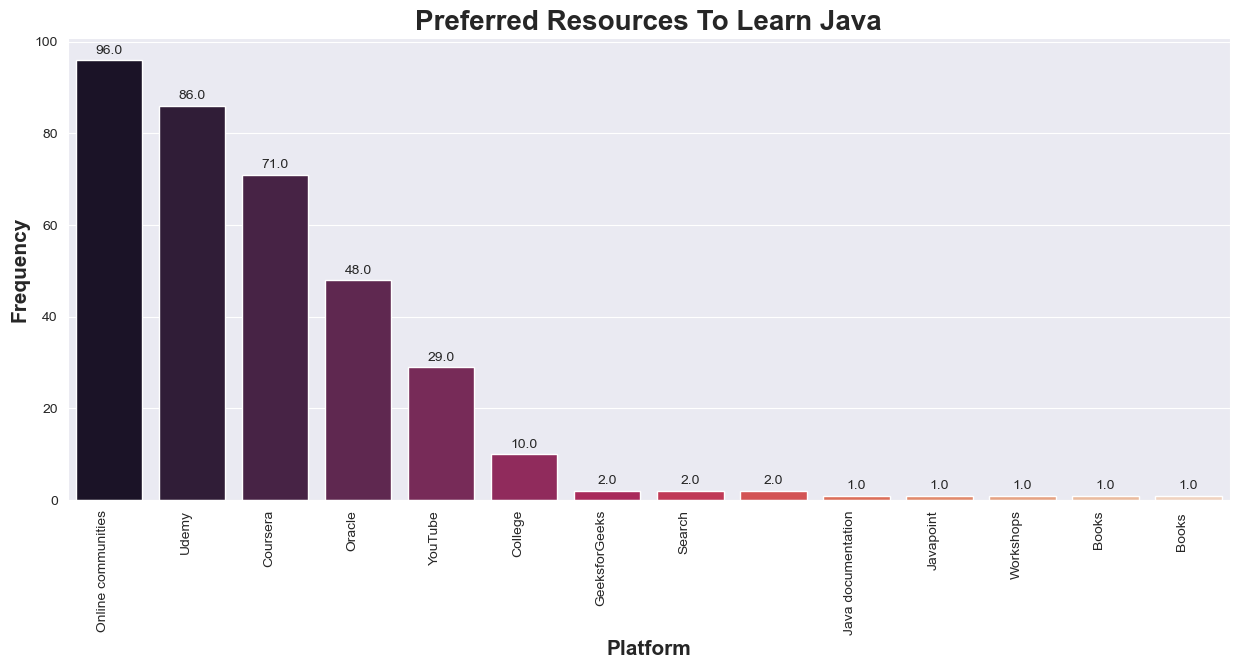

In [20]:
resources_java = df['Java_learning_resources'].str.split(';').explode()
count_resources_java = resources_java.value_counts().sort_values()
plot_bar(data=count_resources_java, x_label= 'Platform', y_label='Frequency', 
         title='Preferred Resources To Learn Java')
plt.xticks(rotation=90, ha='right');

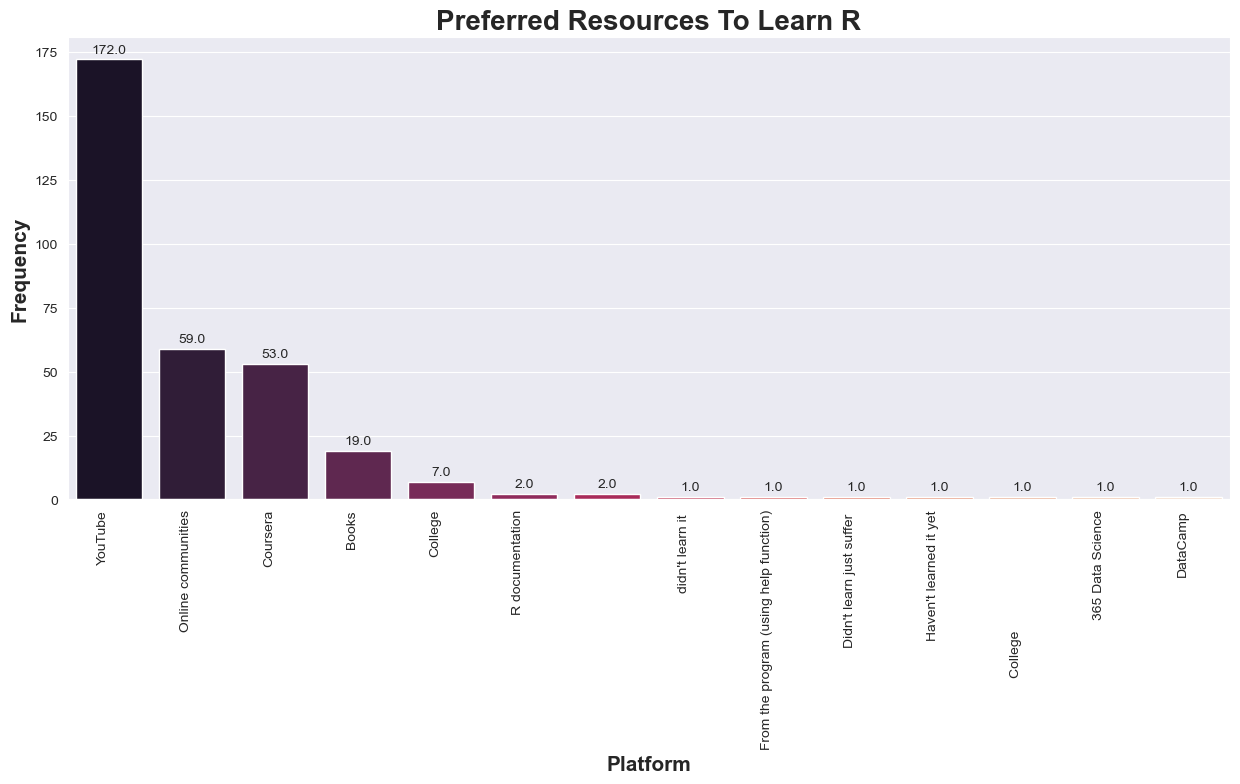

In [21]:
resources_r = df['R_learning_resources'].str.split(';').explode()
count_resources_r = resources_r.value_counts()
plot_bar(data=count_resources_r, x_label= 'Platform', y_label='Frequency', 
         title='Preferred Resources To Learn R')
plt.xticks(rotation=90, ha='right');

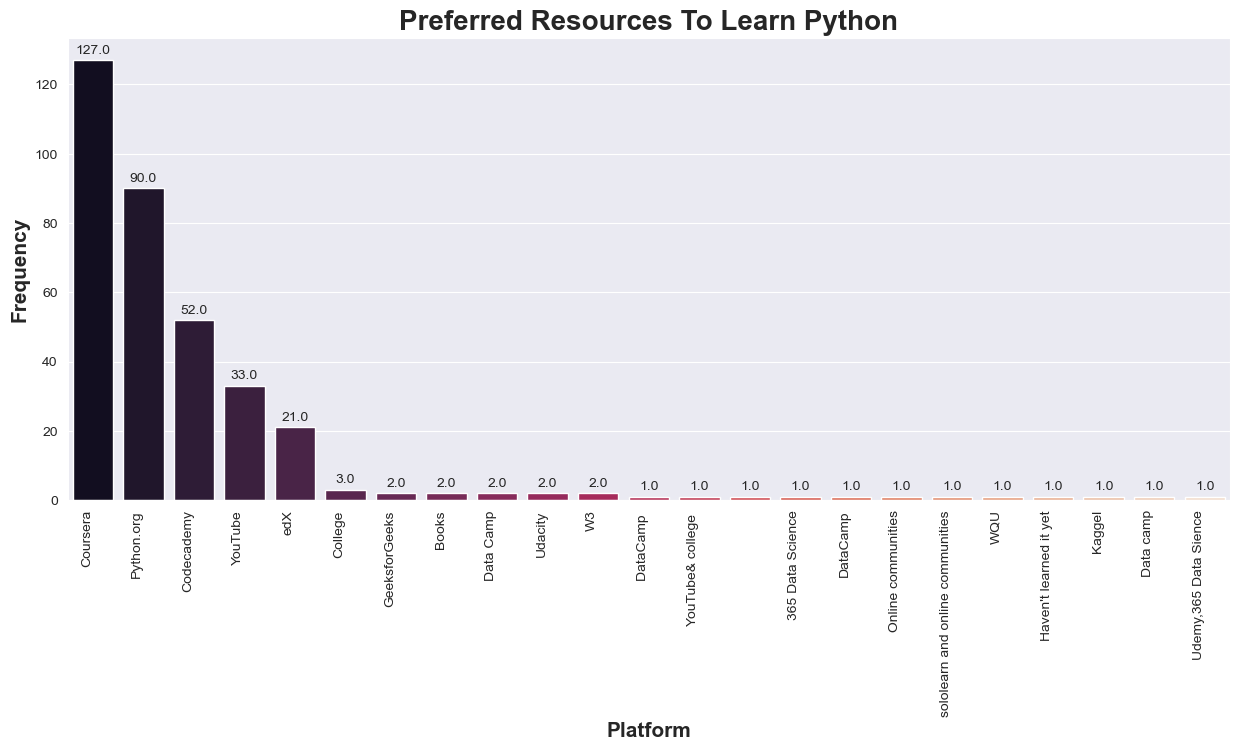

In [22]:
resources_python = df['Python_learning_resources'].str.split(';').explode()
count_resources_python = resources_python.value_counts()
plot_bar(data=count_resources_python, x_label= 'Platform', y_label='Frequency', 
         title='Preferred Resources To Learn Python')
plt.xticks(rotation=90, ha='right');

In [23]:
df_resources =pd.concat(
    [
        resources_java,
        resources_python,
        resources_r,
    ]
).to_frame(name='Platform')

java = np.repeat('Java', resources_java.shape[0])
r = np.repeat('R', resources_r.shape[0])
python = np.repeat('Python', resources_python.shape[0])

all_languages = java.tolist()+r.tolist()+python.tolist()
df_resources['Language'] = all_languages

In [24]:
df_resources.head()

Platform Language
0  Online communities     Java
0              Oracle     Java
1               Udemy     Java
1              Oracle     Java
1            Coursera     Java

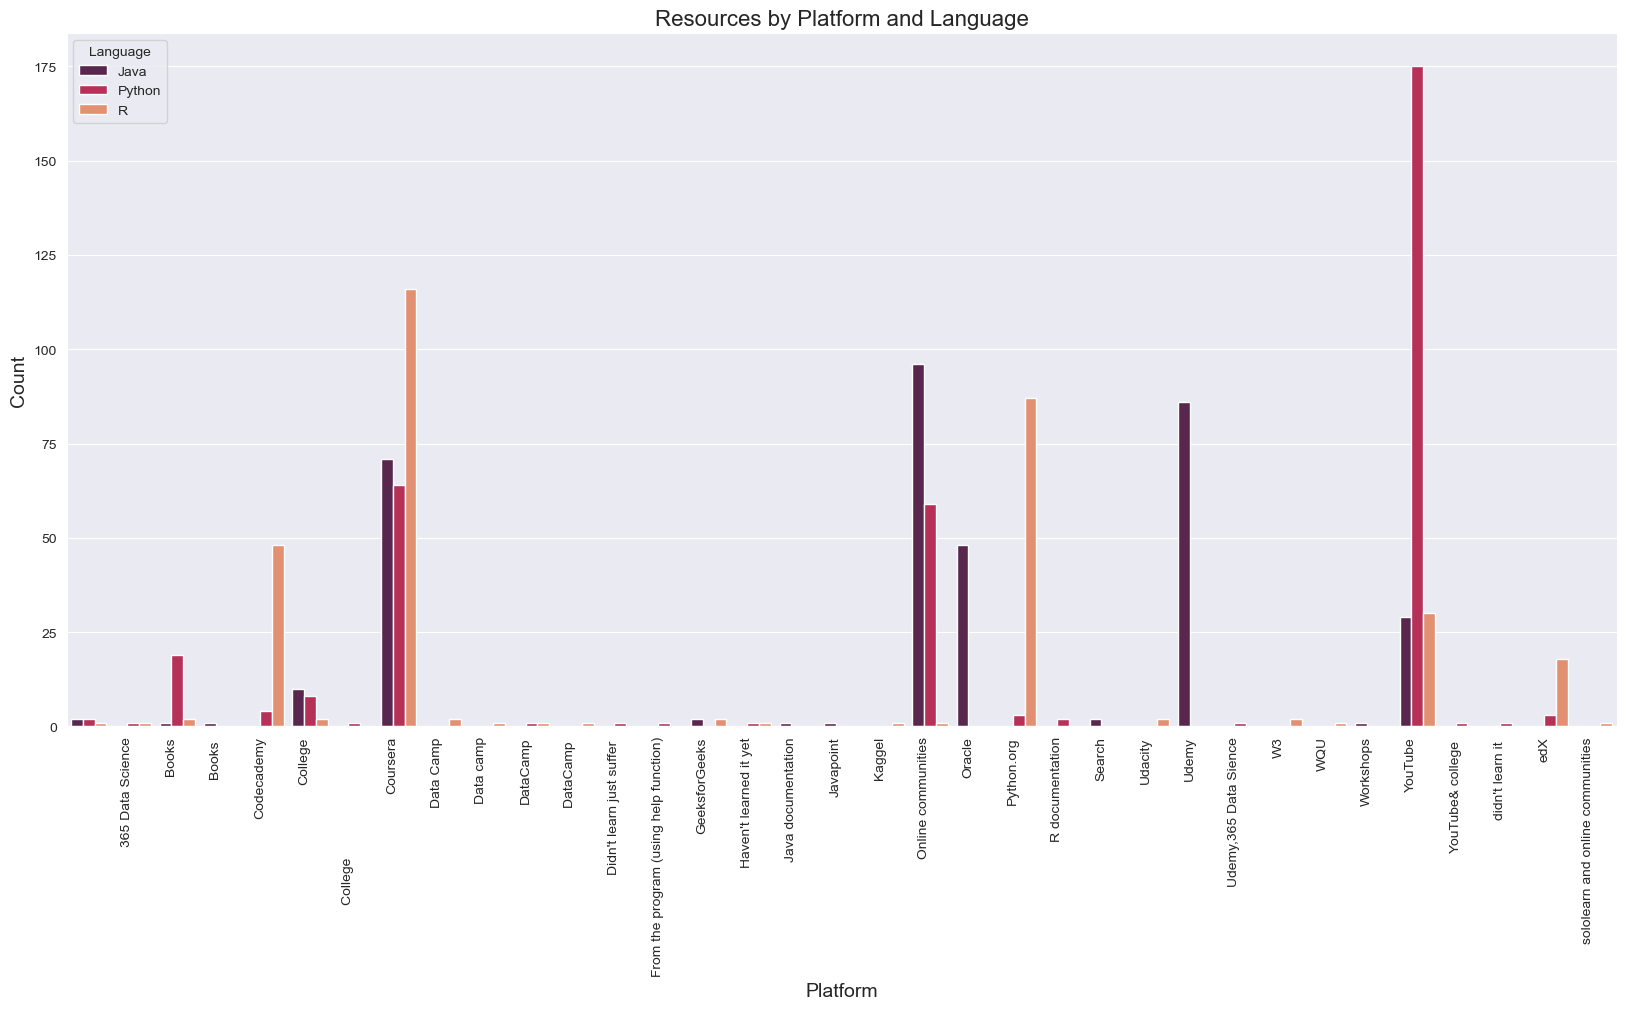

In [25]:
count_resources = df_resources.groupby(['Platform', 'Language']).size().reset_index(name='Count')

# Create a bar plot of the count of resources by platform and language
plt.figure(figsize=(20,9))
sns.barplot(x='Platform', y='Count', hue='Language', data=count_resources, palette='rocket')
plt.title('Resources by Platform and Language', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right');
plt.show()

## 5.Rating students' familiarity level and experience with each language

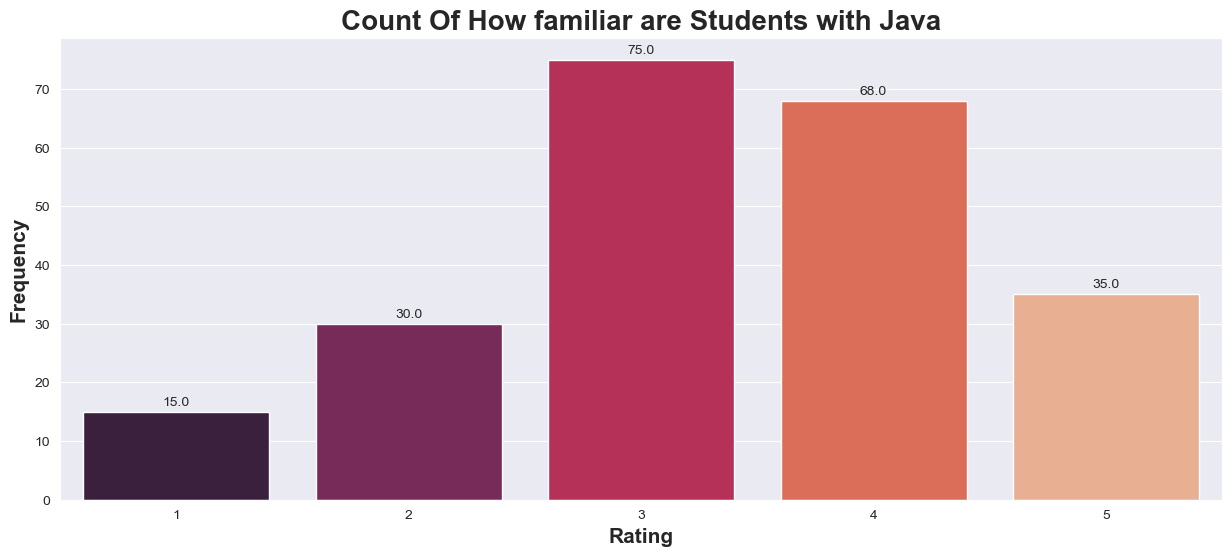

In [26]:
fam_java = df['Familiarity_with_Java'].value_counts()
plot_bar(data=fam_java, x_label= 'Rating', y_label='Frequency', 
         title='Count Of How familiar are Students with Java', sort=False)


> There are more students with higher scores (4 and 5) than with lower scores (1 and 2) suggests that the overall level of familiarity with **Java** among the students is **relatively high**.

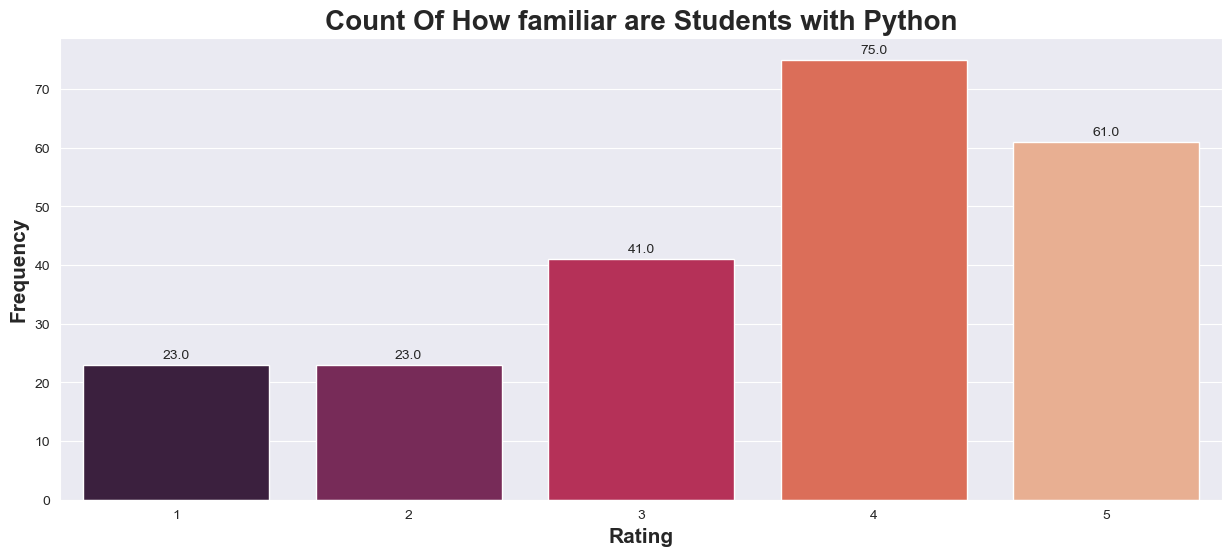

In [27]:
fam_python = df['Familiarity_with_Python'].value_counts()
plot_bar(data=fam_python, x_label= 'Rating', y_label='Frequency', 
         title='Count Of How familiar are Students with Python', sort=False)

> There are more students with higher scores (4 and 5) than with lower scores (1 and 2) suggests that the overall level of familiarity with **Python** among the students is **relatively high**.

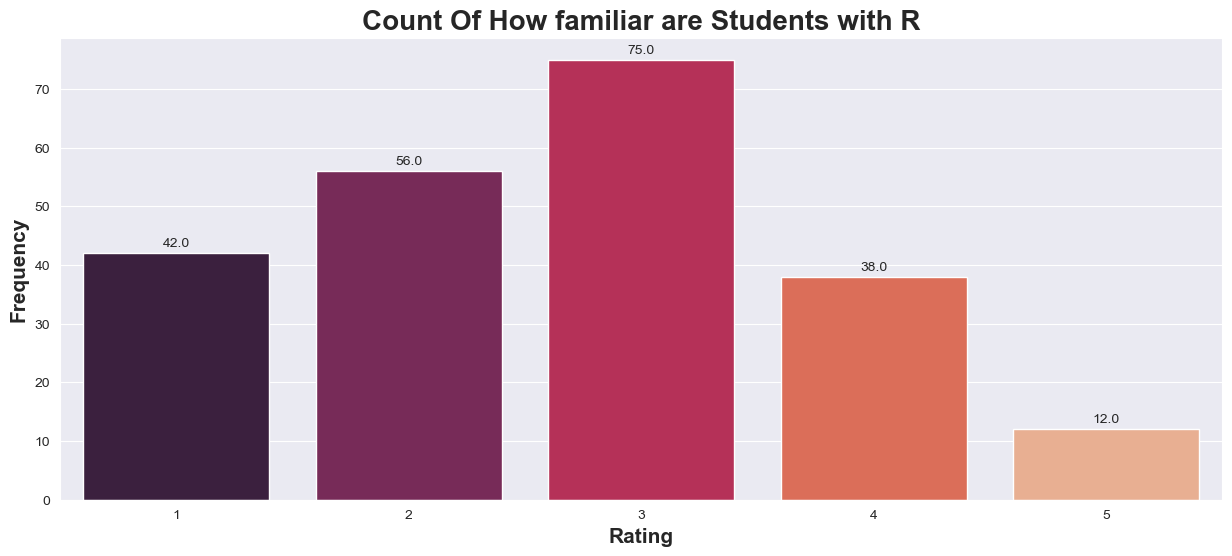

In [28]:
fam_r = df['Familiarity_with_R'].value_counts()
plot_bar(data=fam_r, x_label= 'Rating', y_label='Frequency', 
         title='Count Of How familiar are Students with R', sort=False)

> There are more students with lower scores (1 and 2) than with higher scores (4 and 5) suggests that the overall level of familiarity with **R** among the respondents is **relatively low**.

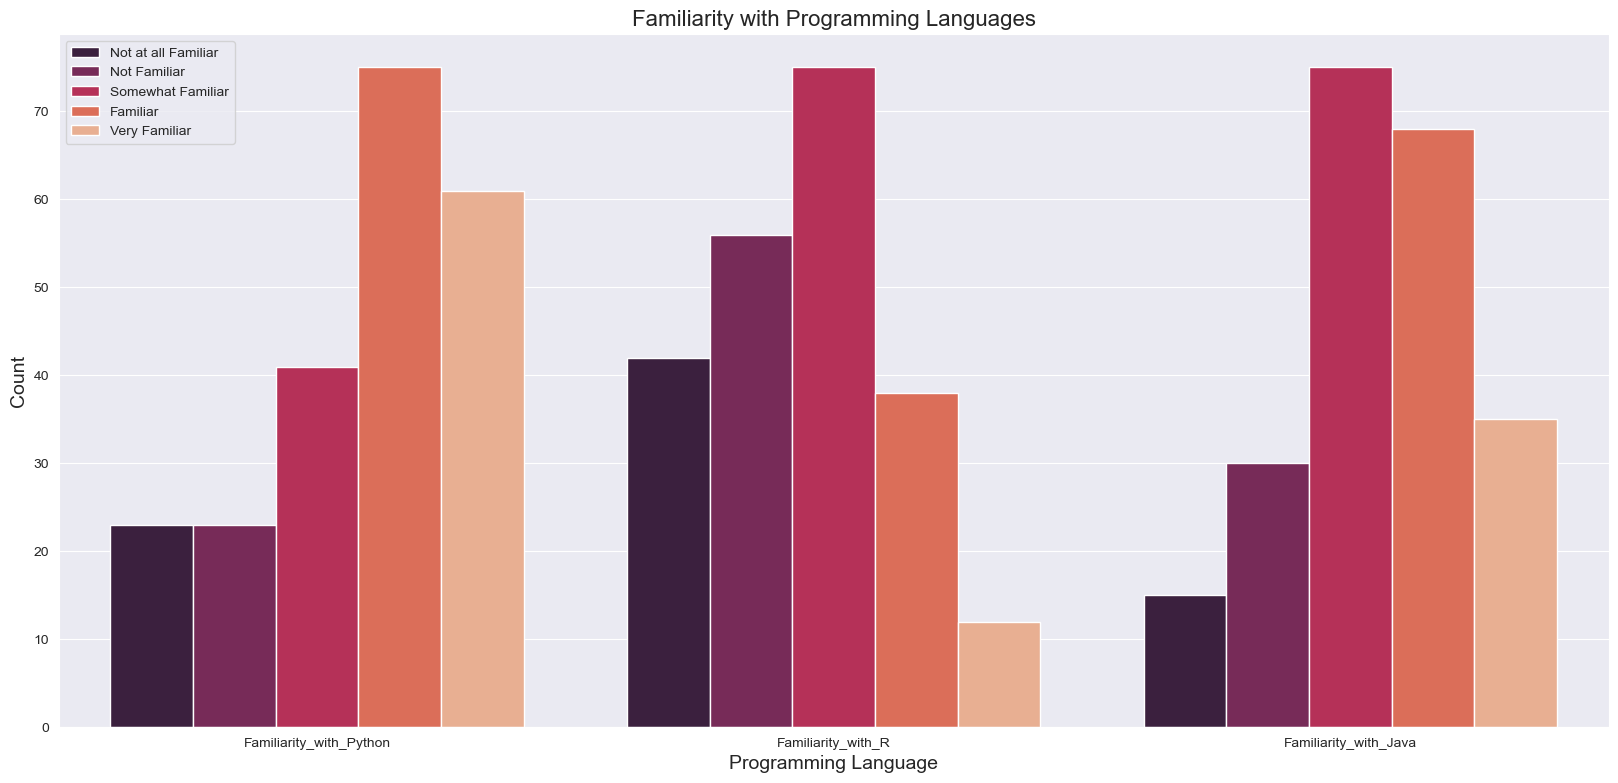

In [29]:
# group the familiarity columns by student level
fam_cols = ['Familiarity_with_Python', 'Familiarity_with_R', 'Familiarity_with_Java']
fam_lang = df[fam_cols].reset_index()

# melt the dataframe to create a long format
fam_melted = fam_lang.melt(id_vars='index', var_name='Language', value_name='Familiarity')

# create the count plot
plt.figure(figsize=(20,9))
sns.countplot(x='Language', hue='Familiarity', data=fam_melted, palette='rocket')

# add a title and labels
plt.title('Familiarity with Programming Languages', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Not at all Familiar', 'Not Familiar' ,  'Somewhat Familiar', 'Familiar' , 'Very Familiar' ])
# show the plot
plt.show()

> **Observations:** 
><ul>               
               <li><strong> Python </strong>and <strong>Java</strong> seem to be <strong>more popular</strong> among the students <strong>than R.</strong></li> <br>
               <li> <strong>Python </strong>and <strong>Java </strong>have a <strong>similar distribution </strong>of scores, with the majority of students reporting moderate to <strong>high levels of familiarity.</strong></li> <br> 
               <li> <strong>R</strong>, on the other hand, has a different distribution of scores, with the majority of students reporting a <strong>moderate level of familiarity</strong> <br> followed by a <strong>relatively low level of familiarity</strong>, and a <strong>significant number </strong>of students reporting <strong>no familiarity with R.</strong></li> <br>    
               <li> Overall, it appears that the students are <strong> more familiar </strong>with <strong>Python </strong>and <strong>Java </strong><strong>than R</strong>.</li> 

</ul>

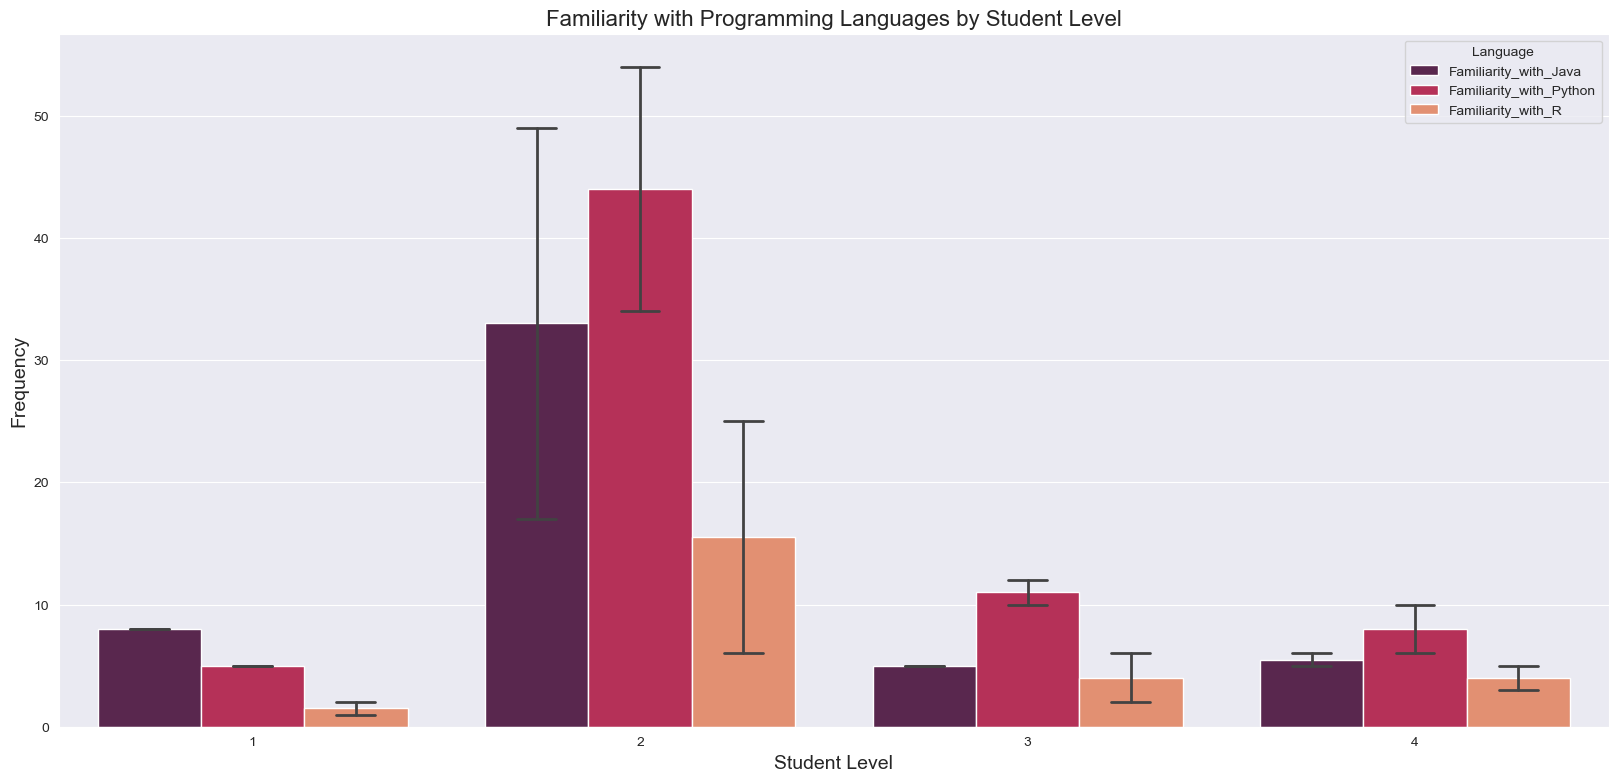

In [30]:
fam_lang_by_level = df[fam_cols + ['Student_level']].melt(id_vars='Student_level', var_name='Language', value_name='Familiarity')
fam_lang_by_level_freq = fam_lang_by_level.groupby(['Student_level', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_level_freq = fam_lang_by_level_freq[fam_lang_by_level_freq["Familiarity"] > 3]
# create the bar plot
plt.figure(figsize=(20,9))
sns.barplot(x='Student_level', y='Count', hue='Language', data=fam_lang_by_level_freq, palette='rocket', errwidth=2, capsize=0.1)

# add a title and labels
plt.title('Familiarity with Programming Languages by Student Level', fontsize=16)
plt.xlabel('Student Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# show the plot
plt.show()

> **Observations:** 
><ul>               
                    <li> <strong> Level 1: </strong> <br> <strong> - Java </strong> is the most common language, this is because they have not studied any other language. <br>- Some students have gained significant familiarity with <strong>Python</strong> despite it not being studied at this level.</li> <br>
               <li> <strong> Level 2: </strong> <br> <strong> - Python &amp; Java</strong> are the most common languages, it means that these languages are gaining more prominence and use in the curriculum <br> at this level.</li> <br> 
               <li> <strong> Level 3 &amp; 4: </strong> <br> <strong> - Python </strong> is the most common language. </li> <br> 
</ul>

 > - Overall, it appears that the students are **more familiar** with **Python** and **Java than R**. <br>
 
 > - the fact that **Python** has relatively high counts even at lower levels, possibly due to its usefulness in data science and other analytical fields, while R may be more specialized and taught to students in specific courses.

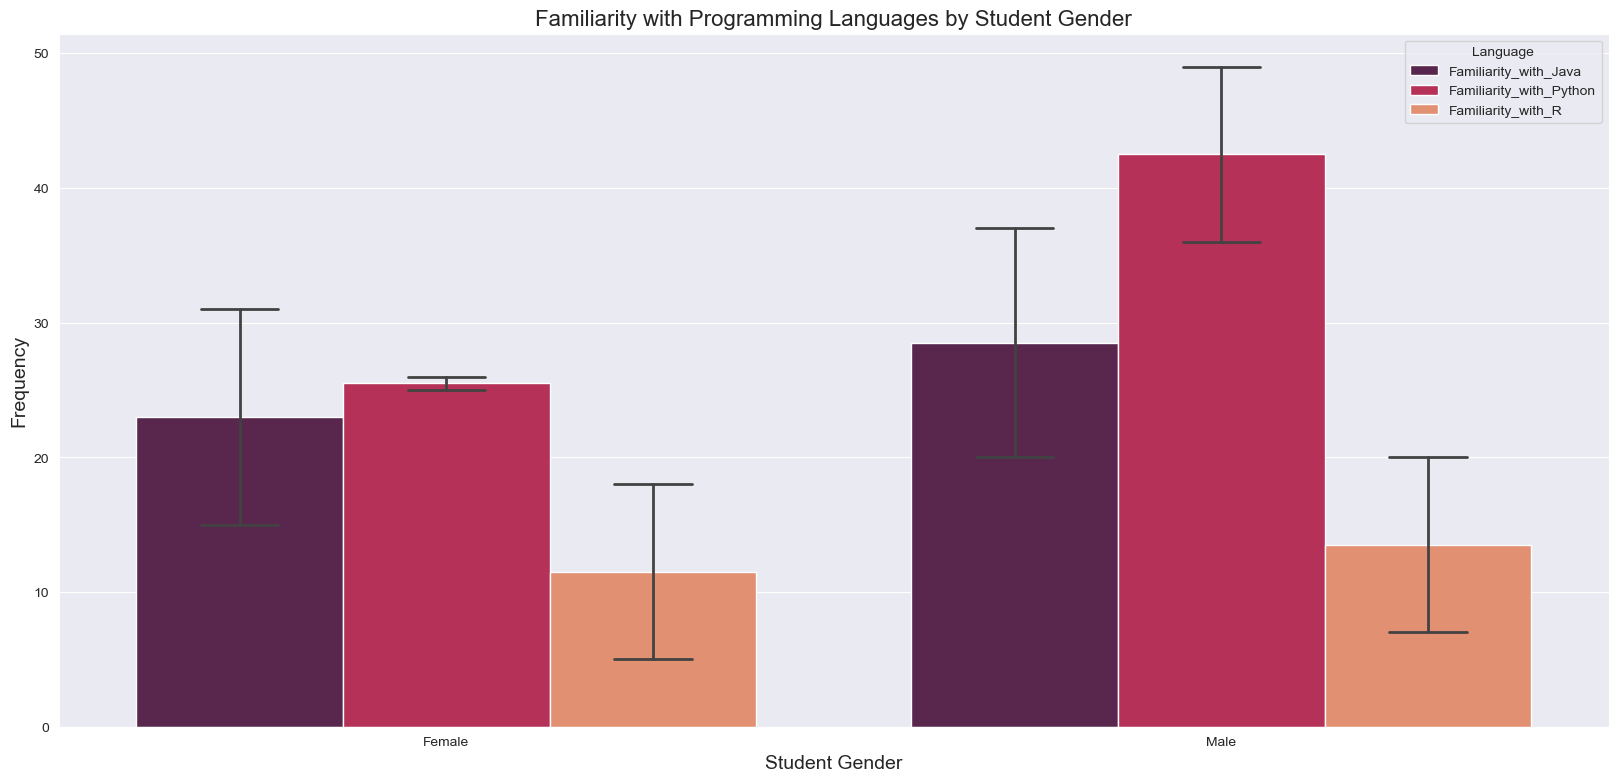

In [31]:
fam_lang_by_gender = df[fam_cols + ['Student_gender']].melt(id_vars='Student_gender', var_name='Language', value_name='Familiarity')
fam_lang_by_gender_freq = fam_lang_by_gender.groupby(['Student_gender', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_gender_freq = fam_lang_by_gender_freq[fam_lang_by_gender_freq["Familiarity"] > 3]

# create the bar plot
plt.figure(figsize=(20,9))
sns.barplot(x='Student_gender', y='Count', hue='Language', data=fam_lang_by_gender_freq, palette='rocket', errwidth=2, capsize=0.1)

# add a title and labels
plt.title('Familiarity with Programming Languages by Student Gender', fontsize=16)
plt.xlabel('Student Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# show the plot
plt.show()

> **Observations:** 
> - **Males** prefer to use **python** more than other languages.
> - **Females** prefer to use **Java** more than other languages.
> - **Both** prefer to use **python and Java** more than **R**


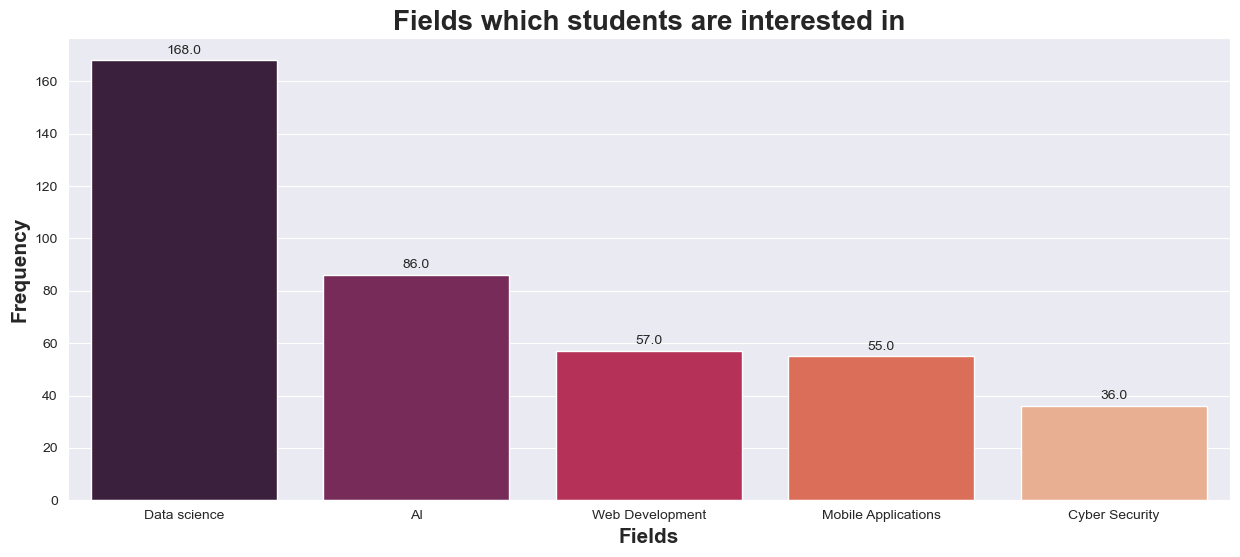

In [32]:
fields_interested = df['Fields_interested_in'].str.split(';').explode()
most_fields_interested = fields_interested.value_counts().iloc[:5]
plot_bar(data=most_fields_interested, x_label='Fields',
         y_label = 'Frequency', title='Fields which students are interested in')

In [33]:
fields = pd.read_csv(r"C:\Users\Afnan\Downloads\dummy_Field_interest.csv")

In [34]:
top_fields = df.reset_index().merge(fields[["Unnamed: 0", "Data science", "AI", "Web Development", "Mobile Applications", "Cyber Security"]], left_on='index', right_on='Unnamed: 0')

In [35]:
fam_lang_by_field1 = top_fields[fam_cols + ['Data science']].melt(id_vars='Data science', var_name='Language', value_name='Familiarity')
fam_lang_by_field1_freq = fam_lang_by_field1.groupby(['Data science', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_field1_freq = fam_lang_by_field1_freq[(fam_lang_by_field1_freq["Familiarity"] > 3) & (fam_lang_by_field1_freq["Data science"] == 1)]

fam_lang_by_field2 = top_fields[fam_cols + ['AI']].melt(id_vars='AI', var_name='Language', value_name='Familiarity')
fam_lang_by_field2_freq = fam_lang_by_field2.groupby(['AI', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_field2_freq = fam_lang_by_field2_freq[(fam_lang_by_field2_freq["Familiarity"] > 3) & (fam_lang_by_field2_freq["AI"] == 1)]

fam_lang_by_field3 = top_fields[fam_cols + ['Web Development']].melt(id_vars='Web Development', var_name='Language', value_name='Familiarity')
fam_lang_by_field3_freq = fam_lang_by_field3.groupby(['Web Development', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_field3_freq = fam_lang_by_field3_freq[(fam_lang_by_field3_freq["Familiarity"] > 3) & (fam_lang_by_field3_freq["Web Development"] == 1)]

fam_lang_by_field4 = top_fields[fam_cols + ['Mobile Applications']].melt(id_vars='Mobile Applications', var_name='Language', value_name='Familiarity')
fam_lang_by_field4_freq = fam_lang_by_field4.groupby(['Mobile Applications', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_field4_freq = fam_lang_by_field4_freq[(fam_lang_by_field4_freq["Familiarity"] > 3) & (fam_lang_by_field4_freq["Mobile Applications"] == 1)]

fam_lang_by_field5 = top_fields[fam_cols + ['Cyber Security']].melt(id_vars='Cyber Security', var_name='Language', value_name='Familiarity')
fam_lang_by_field5_freq = fam_lang_by_field5.groupby(['Cyber Security', 'Language', 'Familiarity']).size().reset_index(name='Count')
fam_lang_by_field5_freq = fam_lang_by_field5_freq[(fam_lang_by_field5_freq["Familiarity"] > 3) & (fam_lang_by_field5_freq["Cyber Security"] == 1)]

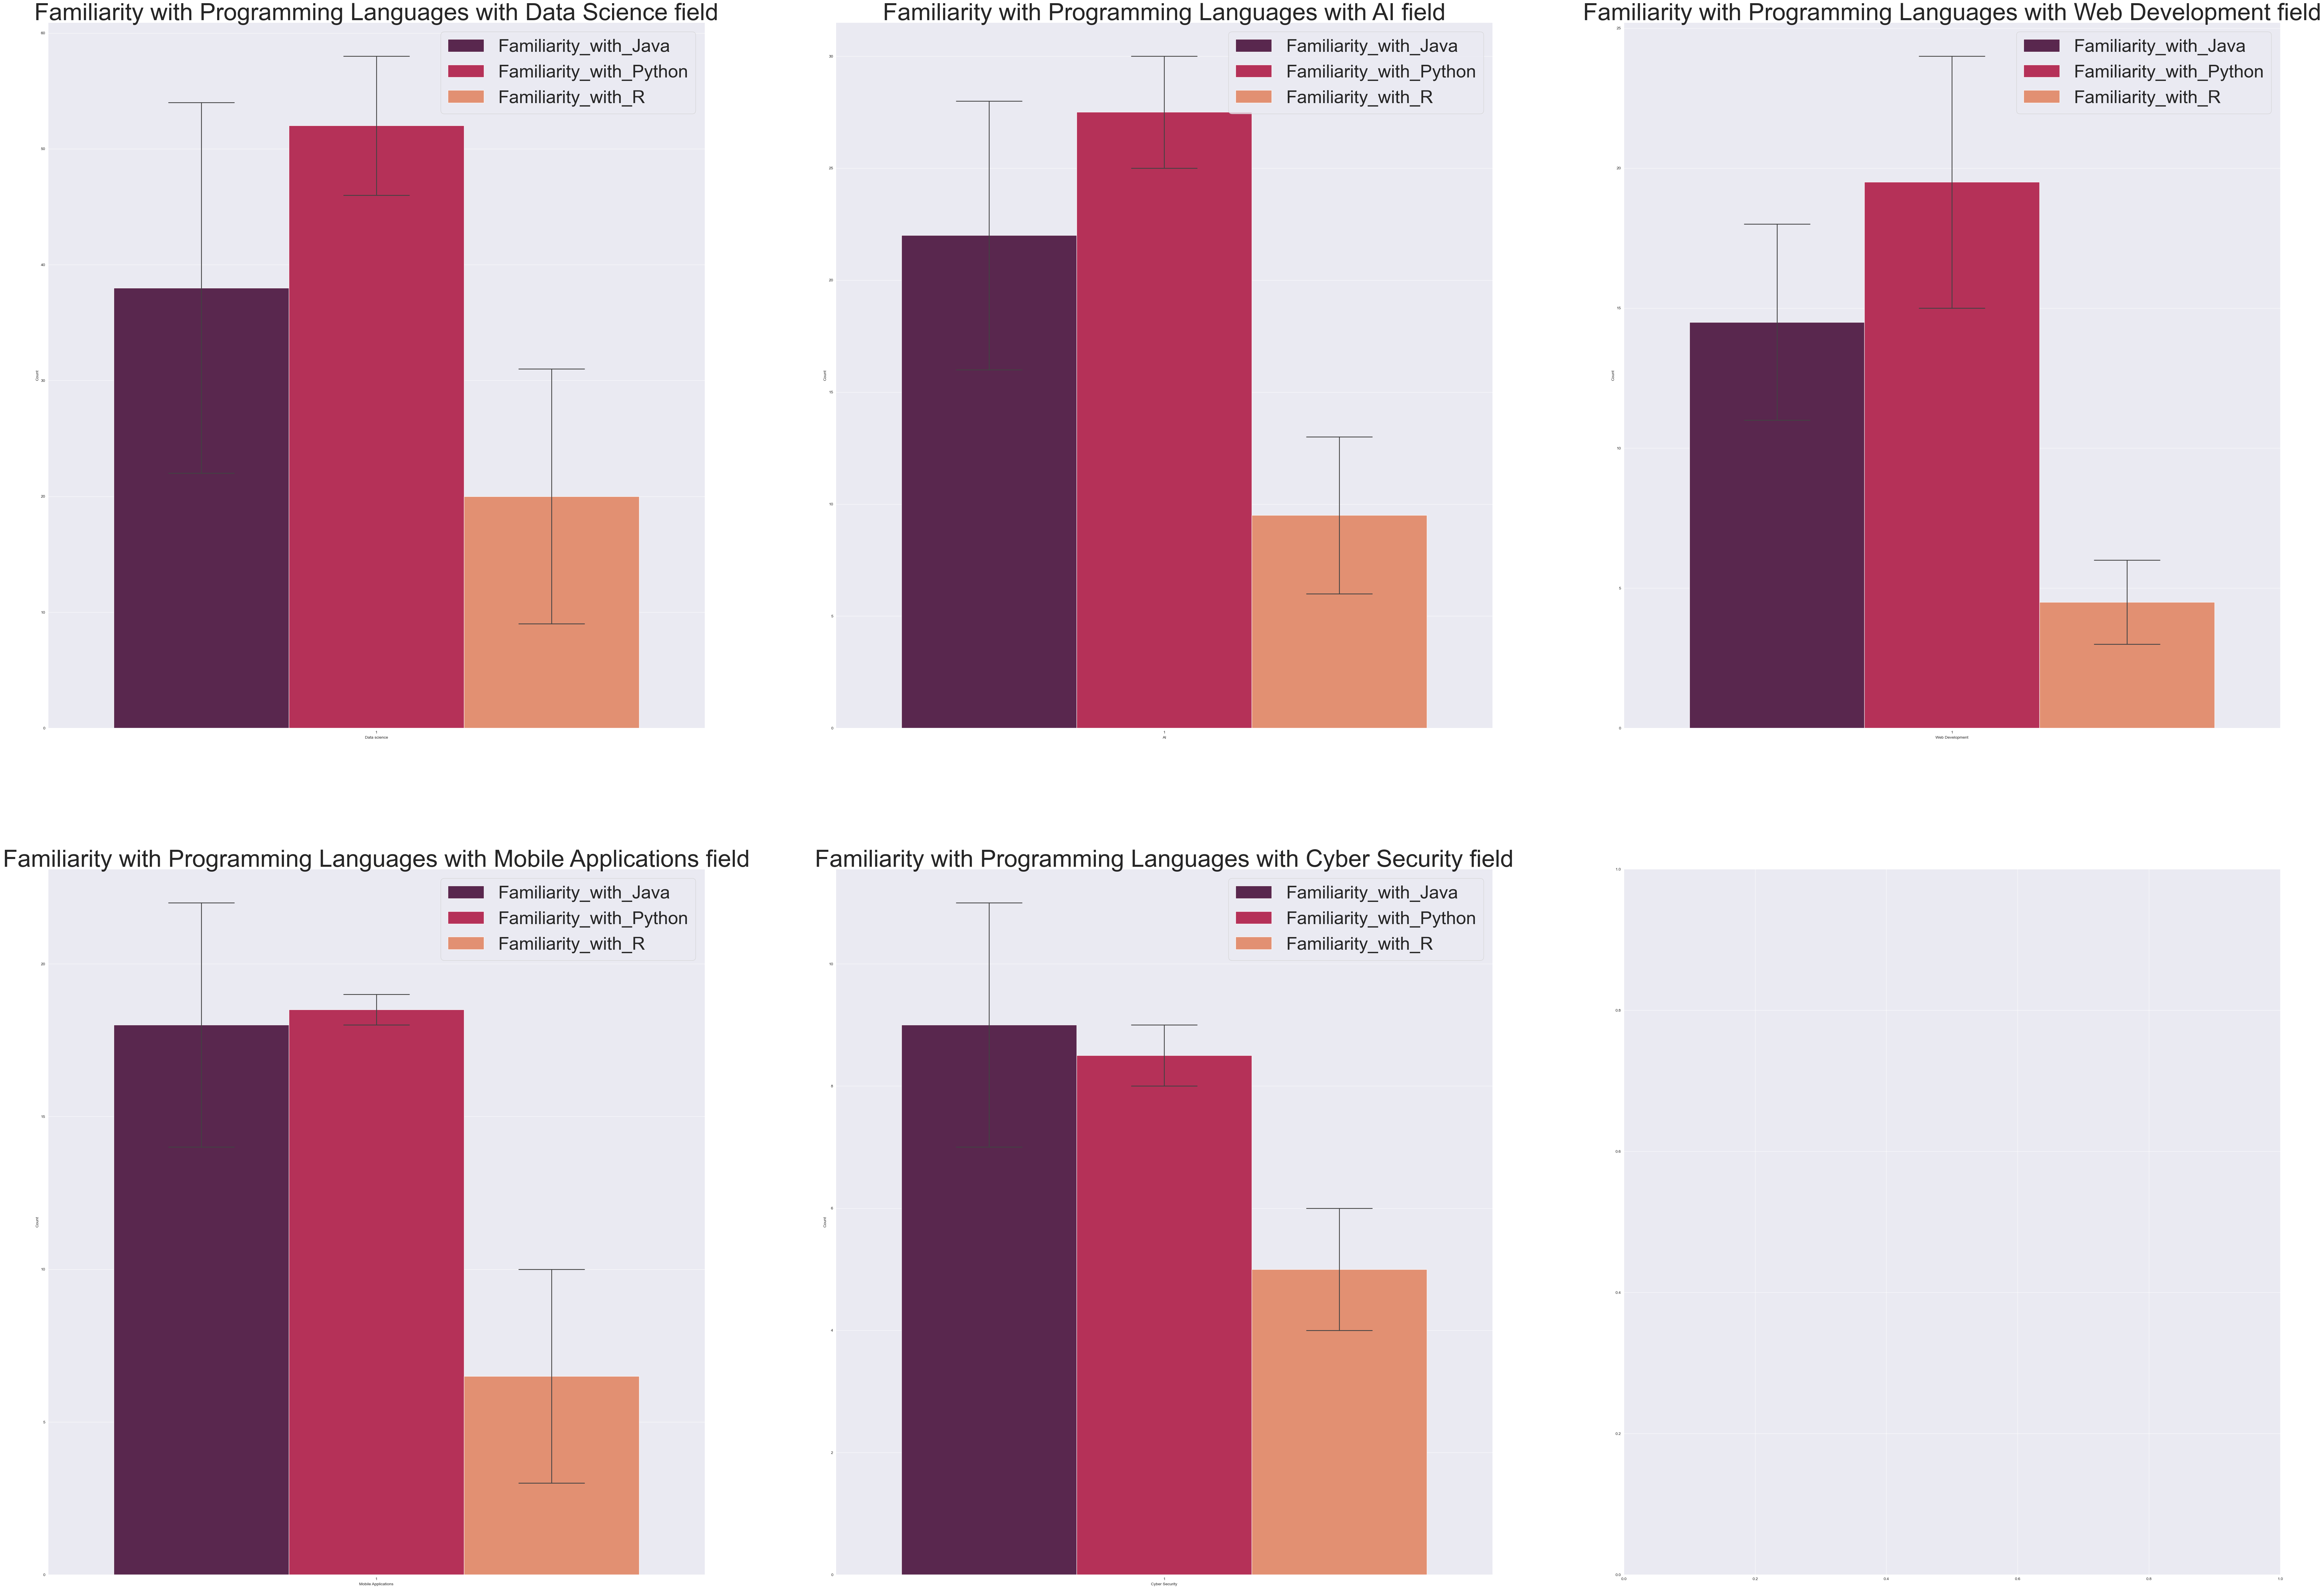

In [36]:
fields_names = ["Data science", "AI", "Web Development", "Mobile Applications", "Cyber Security"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(100,70))

# create the bar plot
sns.barplot(x='Data science', y='Count', hue='Language', data=fam_lang_by_field1_freq, palette='rocket', 
            errwidth=2, capsize=0.1, ax=axs[0, 0]).set_title("Familiarity with Programming Languages with Data Science field", fontsize=60)
axs[0, 0].legend(fontsize=45)

# create the bar plot
sns.barplot(x='AI', y='Count', hue='Language', data=fam_lang_by_field2_freq, palette='rocket', 
            errwidth=2, capsize=0.1, ax=axs[0, 1]).set_title("Familiarity with Programming Languages with AI field", fontsize=60)
axs[0, 1].legend(fontsize=45)


# create the bar plot
sns.barplot(x='Web Development', y='Count', hue='Language', data=fam_lang_by_field3_freq, palette='rocket',
            errwidth=2, capsize=0.1, ax=axs[0, 2]).set_title("Familiarity with Programming Languages with Web Development field", fontsize=60)
axs[0, 2].legend(fontsize=45)


# create the bar plot
sns.barplot(x='Mobile Applications', y='Count', hue='Language', data=fam_lang_by_field4_freq, palette='rocket', 
            errwidth=2, capsize=0.1, ax=axs[1, 0]).set_title("Familiarity with Programming Languages with Mobile Applications field", fontsize=60)
axs[1, 0].legend(fontsize=45)


# create the bar plot
sns.barplot(x='Cyber Security', y='Count', hue='Language', data=fam_lang_by_field5_freq, palette='rocket', 
            errwidth=2, capsize=0.1, ax=axs[1, 1]).set_title("Familiarity with Programming Languages with Cyber Security field", fontsize=60)
axs[1, 1].legend(fontsize=45)


# show the plot
plt.show()

> **Observations:** 
> - **Python** is most familiar with students interested in **Data Science**, **AI** and **Web Development** fields.
> - **Java** is most familiar with students interested in **Mobile Applications** and **Cyber Security** fields.
> - **R** is slightly more familiar in **Cyber Security** field compared to other fields.
>
> - Overall, **Python** and **Java** seem to be the **most** familiar programming languages among the students, while **R** is the **least** familiar.

## 6.How do job market demand for each language influence the language choice for students?

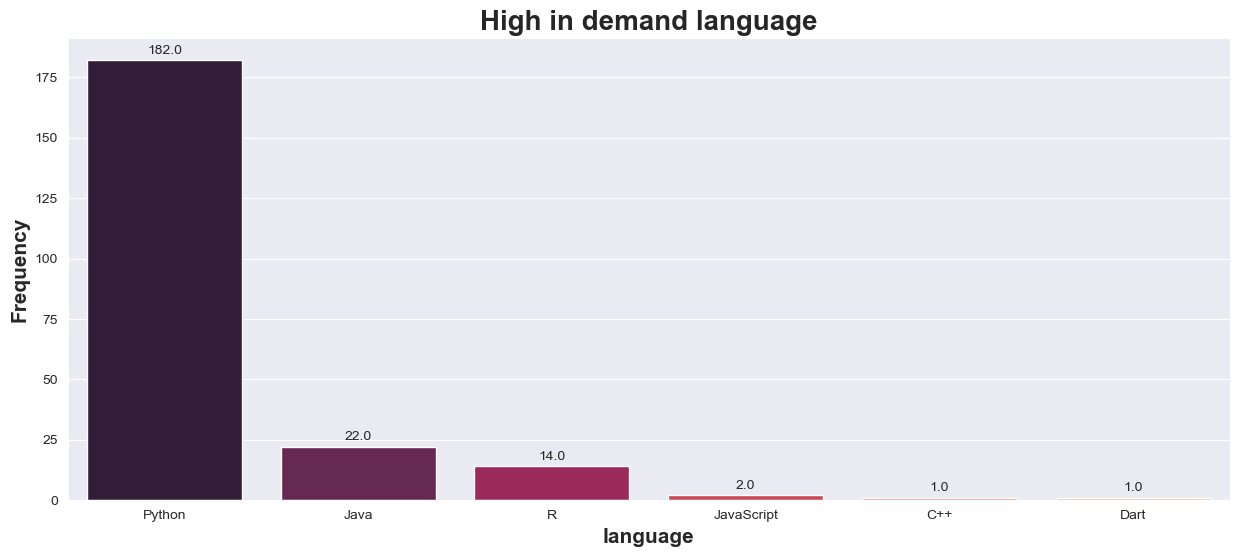

In [37]:
plot_bar(data=df["High_in_demand_language"].value_counts().iloc[:-1], x_label= 'language', y_label='Frequency', 
         title='High in demand language', sort=False)

> **Observations:** <br>
> - **Python** is the most in-demand programming language. This suggests that Python is heavily used and sought after in the job market.
> - **Java** is the second most in-demand programming language. While it is much lower than Python, it still suggests that Java is a popular and widely used language in various industries.
> - **R** has a relatively low count compared to Python and Java, but it still indicates that there is some demand for this language in industries that require statistical analysis and data science.

In [38]:
cross_tab_p = pd.crosstab(df['High_in_demand_language'], df['Consider_trends_when_choosing_a_language'])
cross_tab_p

Consider_trends_when_choosing_a_language            No  Yes  sometimes
High_in_demand_language                                               
C++                                                  0    1          0
Dart                                                 0    0          1
It depends, each one is beneficial in some fields.   0    0          1
Java                                                 6    7          9
JavaScript                                           1    0          1
Python                                              10  100         72
R                                                    4    6          4

> **Observations:** <br>
> **Python** is currently the most versatile and widely applicable programming language, with **Java** following closely behind.


## 7.How do students choose between these three languages for specific data science tasks or projects?

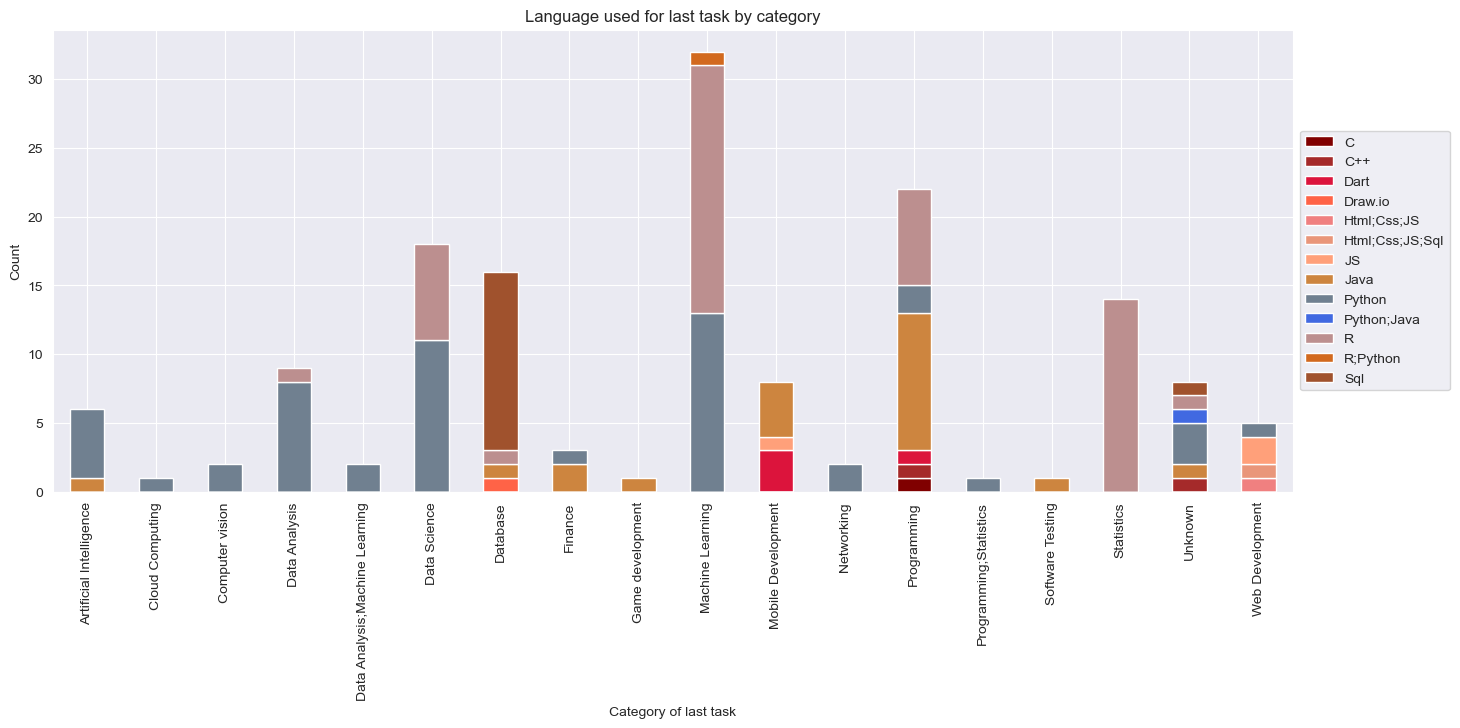

In [39]:

# Filter the dataset to include only rows with non-empty "Last_task_worked_on" column
df = df[df['Last_task_worked_on'].notnull()]

# Create a new dataframe with the relevant columns
new_df = df[['Last_task_worked_on', 'Category_of_last_task_worked_on', 'Language_used', 'and_why']]

# Create a pivot table with "Category_of_last_task_worked_on" as the rows, "Language_used" as the columns, and the count of occurrences as the values
pivot_df = new_df.pivot_table(index='Category_of_last_task_worked_on', columns='Language_used', values='Last_task_worked_on', aggfunc='count')

# Visualize the pivot table using a stacked bar chart
new_colors=['#800000','#A52A2A','#DC143C','#FF6347','#F08080','#E9967A','#FFA07A','#CD853F','#708090','#4169E1','#BC8F8F','#D2691E','#A0522D']
ax = pivot_df.plot(kind='bar', stacked=True,color=new_colors,figsize=(16,6))

# Set the chart title and axis labels
ax.set_title('Language used for last task by category')
ax.set_xlabel('Category of last task')
ax.set_ylabel('Count')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the chart
plt.show()

>***observations:***

>After we doing analysis for the "Last_task_worked_on" and "Category_of_last_task_worked_on"
columns to see the types of tasks or projects that the students have worked on in the
past , we find that:<br> 
> - **Python** is used in multiple fields like Artificial intelligence ,Data science ,Machine learning , computer vision ,cloud computing , Networking , statistics<br>
From the above , We can conclude that Python is used in various Fields <br>
> - **R** is used in statistics , machine learning , Data science , Data Analysis<br> 
From the above, we also conclude that most of uses of R are in statistics and machine learning <br>
> - **Java** is used in Programming , Mobile development ,Game development , Finance , Artificial intelligence, Software testing<br> 
Although there are many languages used in programming such as C and C++, but Java is the most used because we took our sample from our college which teaching a programming course using Java <br>
> - **SQL** is mainly used in database <br>
SQL appeared greatly in students' responses because a large number of respondents are currently studying Database<br>
> - Depending on the level and different studies, other languages appeared, such as **Dart** which used in Mobile Programing<br> 
And also **HTML , JS and CSS** are used in Web development

## 8.What is the importance of having knowledge of multiple languages in the field of data science?

In [40]:
data_filtered =df[['Fields_interested_in','Importance_degree_of_knowing_multiple_languages','Preferred_language_for_projects']]

In [41]:
science = data_filtered[data_filtered['Fields_interested_in'].str.contains('Data science.*')]

In [42]:
science['Fields_interested_in'] = 'Data science'

>**Observation:** 
<br>
**Data Science** is the most used field among students with 75% and it is higher than the next frequent field "**AI**" about 50% , and this is due to the fact that our sample is the students of the general department (Data Science)

In [43]:
counts = science["Preferred_language_for_projects"].value_counts()
print(counts)

Python    91
R         20
Java       9
Name: Preferred_language_for_projects, dtype: int64


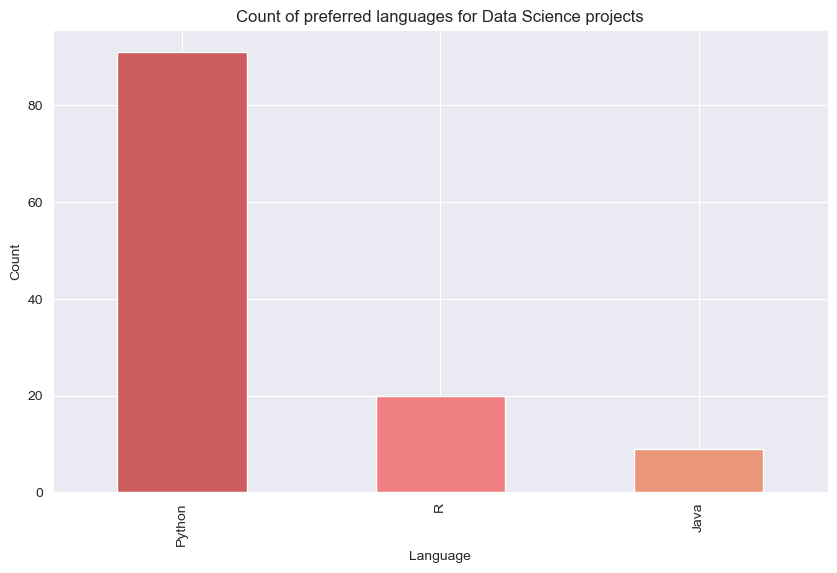

In [44]:
import matplotlib.pyplot as plt

counts = science["Preferred_language_for_projects"].value_counts()
counts.plot(kind='bar', figsize=(10, 6), color=['#CD5C5C','#F08080','#E9967A'])
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Count of preferred languages for Data Science projects')
plt.show()

>**Observation:** 
<br>
Counting the number of students who use each language among them <br>
Finding that Python is the most used language in the field of data science with 76%

In [45]:
importance = science['Importance_degree_of_knowing_multiple_languages']

In [46]:
mode_importance = importance.mode()[0]
print(f"Mode importance: {mode_importance:.2f}")

Mode importance: 3.00


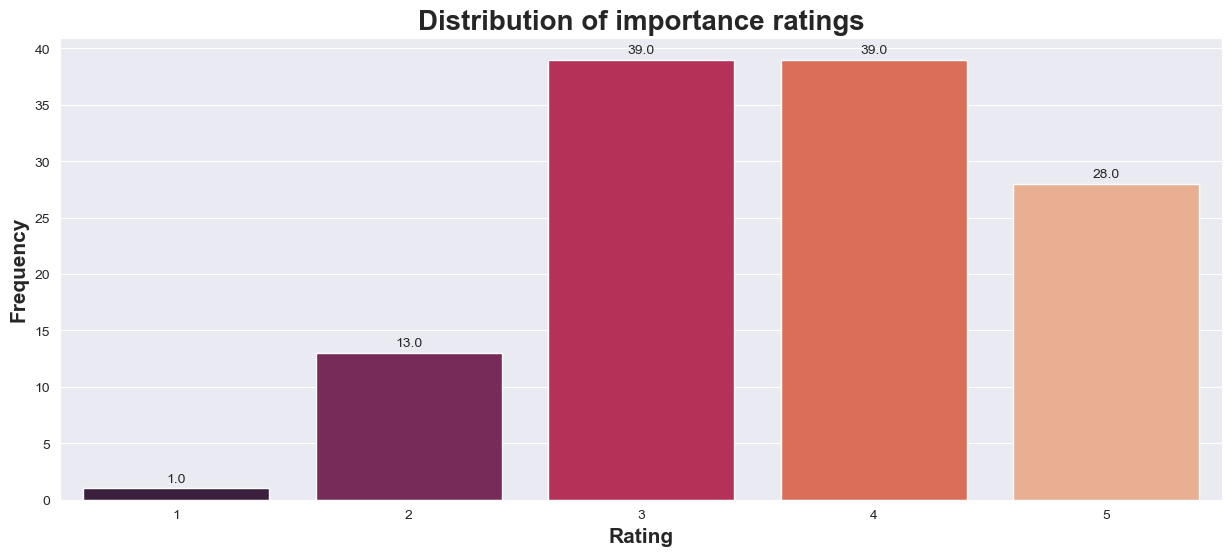

In [47]:
multiple = science['Importance_degree_of_knowing_multiple_languages'].value_counts()
plot_bar(data=multiple, x_label= 'Rating', y_label='Frequency', 
         title='Distribution of importance ratings', sort=False)


>**Observation:** 
<br>
Most students who use data science find that the important of knowing multiple languages for use in data science is four of importance

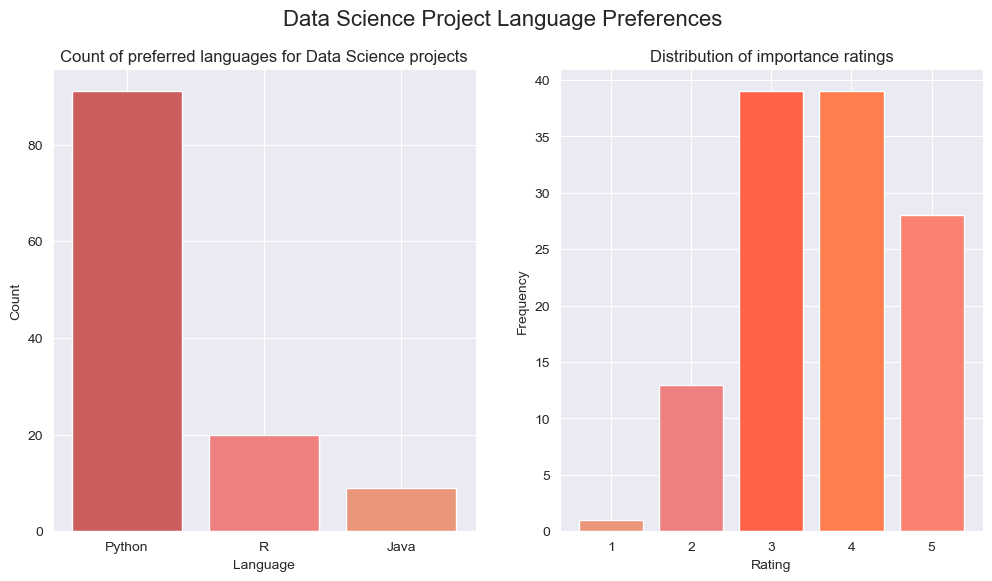

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
counts = science["Preferred_language_for_projects"].value_counts()
axs[0].bar(counts.index, counts.values, color=['#CD5C5C','#F08080','#E9967A'])
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Count')
axs[0].set_title('Count of preferred languages for Data Science projects')

multiple = science['Importance_degree_of_knowing_multiple_languages'].value_counts()
axs[1].bar(multiple.index, multiple.values, color=['#FF6347','#FF7F50','#FA8072','#F08080','#E9967A'])
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of importance ratings')
fig.suptitle('Data Science Project Language Preferences', fontsize=16)

plt.show()

>**Observation:** 
<br>
In data science, Python is the most prefered and students find the need to learn multiple language is four of importance


In [49]:
market = df[['Prefer_to_use_familiar_language','Consider_trends_when_choosing_a_language']]

In [50]:
familiar = market[(market['Prefer_to_use_familiar_language'] == "Yes") & 
            (market['Consider_trends_when_choosing_a_language'] == "sometimes")]

>**Observation:**
<br>
Students who choose yes and sometimes mean that they prefer choose language which they are familiar with it and rarly use the language based on the trend



> **Observations:** <br>
> - Based on the analysis we conducted, it is clear that students are less familiar with the R programming language, and this may be because they do not have access to good and professional learning resources for it. 
> - We can provide them with such resources and also inform them about the importance of learning R for the job market and the data science field. 
> - We can also conduct a survey to understand why students are not familiar with R.

In [51]:
df.head()

Student_age  Student_level Student_gender  \
0          21              3           Male   
1          20              2         Female   
3          20              2           Male   
4          21              3         Female   
6          21              2           Male   

                  Fields_interested_in Helps_the_most High_in_demand_language  \
0         Data science;Web Development         Python                  Python   
1                      AI;Data science         Python                  Python   
3  Mobile Applications;AI;Data science         Python                  Python   
4     Mobile Applications;Data science           Java                  Python   
6                         Data science         Python                  Python   

  Prefer_to_use_familiar_language  Familiarity_with_Python  \
0                             Yes                        5   
1                             Yes                        5   
3                             Yes                        4   
4                             Yes                        5   
6                             Yes                        4   

   Familiarity_with_R  Familiarity_with_Java  ...  \
0                   3                      2  ...   
1                   4                      3  ...   
3                   2                      4  ...   
4                   4                      5  ...   
6                   4                      3  ...   

   Best_community_support_and_resources How_easy_learning_Python  \
0                                Python                        5   
1                                Python                        5   
3                                Python                        4   
4                                Python                        5   
6                                Python                        5   

  How_easy_learning_R How_easy_learning_Java  \
0                   3                      2   
1                   4                      3   
3                   2                      5   
4                   3                      4   
6                   4                      3   

                                   Python_usage Python_learning_resources  \
0               Data analysis and visualization       Python.org;Coursera   
1  Machine learning and artificial intelligence       Codecademy;Coursera   
3  Machine learning and artificial intelligence   edX;Python.org;Coursera   
4  Machine learning and artificial intelligence             Python.org;W3   
6  Machine learning and artificial intelligence       Python.org;Coursera   

           Java_usage                   Java_learning_resources  \
0                 OOP                 Online communities;Oracle   
1                GUIs                     Udemy;Oracle;Coursera   
3                 OOP        Online communities;Oracle;Coursera   
4  Mobile development                                   YouTube   
6  Mobile development  Udemy;Online communities;Oracle;Coursera   

                           R_usage         R_learning_resources  
0             Statistical analysis                      YouTube  
1             Statistical analysis  Coursera;Online communities  
3  Data analysis and visualization   YouTube;Online communities  
4  Data analysis and visualization              R documentation  
6             Statistical analysis       Coursera;YouTube;Books  

[5 rows x 32 columns]

In [52]:
data = df.copy()

In [53]:
import pandas as pd
from scipy.stats import kruskal, rankdata


# Convert the ordinal variables to ranks
ordinal_vars = ['Familiarity_with_Python', 'Familiarity_with_R', 'Familiarity_with_Java']
data[ordinal_vars] = data[ordinal_vars].apply(rankdata)

# Perform the Kruskal-Wallis test for each ordinal variable
for var in ordinal_vars:
    groups = []
    for i in range(1, 5):
        group_data = data[data['Student_level'] == i][var]
        groups.append(group_data)
    result = kruskal(*groups)
    print(f"Kruskal-Wallis test for {var}:")
    print(f"Test statistic: {result.statistic}")
    print(f"P-value: {result.pvalue}")
    
    # Evaluate the test result based on the p-value
    if result.pvalue < 0.05:
        print(f"There is a significant difference in {var} between at least two groups.\n")
    else:
        print(f"There is no significant difference in {var} between any groups.\n")

Kruskal-Wallis test for Familiarity_with_Python:
Test statistic: 26.475291070287565
P-value: 7.583778506425359e-06
There is a significant difference in Familiarity_with_Python between at least two groups.

Kruskal-Wallis test for Familiarity_with_R:
Test statistic: 23.107419442251295
P-value: 3.8353647864454084e-05
There is a significant difference in Familiarity_with_R between at least two groups.

Kruskal-Wallis test for Familiarity_with_Java:
Test statistic: 2.037250407303049
P-value: 0.5647113512131181
There is no significant difference in Familiarity_with_Java between any groups.



>  ***observations:***<br>
   Kruskal-Wallis test for 
    <ul>
    <li>'Familiarity_with_Python':p-value = 1.4981758435078165e-09</li>
    <li>'Familiarity_with_R': p-values 9.70916428348183e-09</li>
     </ul>
 <br>
    **level of education has an impact on the familiarity with Python and R among students.**
     <ul>
    <li>'Familiarity_with_Java' has a relatively large p-value of 0.8130869251221945</li>
     </ul>
 <br>
    **level of education may not have a significant impact on the
familiarity with Java among students.**

In [54]:
import scikit_posthocs as sp

# Get the familiarity levels of Python for each student level
python_data = []
for i in range(1, 5):
    group_data = data[data['Student_level'] == i]['Familiarity_with_Python']
    python_data.append(group_data)

result = sp.posthoc_dunn(python_data, p_adjust='bonferroni')

result

1         2         3         4
1  1.000000  0.000144  0.000160  0.000338
2  0.000144  1.000000  0.872095  1.000000
3  0.000160  0.872095  1.000000  1.000000
4  0.000338  1.000000  1.000000  1.000000

In [55]:
import scikit_posthocs as sp

# Get the familiarity levels of Python for each student level
python_data = []
for i in range(1, 5):
    group_data = data[data['Student_level'] == i]['Familiarity_with_R']
    python_data.append(group_data)

result = sp.posthoc_dunn(python_data, p_adjust='bonferroni')

result

1         2         3         4
1  1.000000  0.000228  0.052961  0.000113
2  0.000228  1.000000  1.000000  0.552537
3  0.052961  1.000000  1.000000  0.743875
4  0.000113  0.552537  0.743875  1.000000

>**observation:**<br>
**level 1 is the group that differ from the other level in the fimilarity with Python and R. 
As expected they are only fimiliar with java**

# Logastic Regression

In [56]:
df.isna().sum()

Student_age                                         0
Student_level                                       0
Student_gender                                      0
Fields_interested_in                                0
Helps_the_most                                      0
High_in_demand_language                             0
Prefer_to_use_familiar_language                     0
Familiarity_with_Python                             0
Familiarity_with_R                                  0
Familiarity_with_Java                               0
Importance_degree_of_knowing_multiple_languages     0
Preferred_language_for_projects                     0
Consider_trends_when_choosing_a_language            0
If_yes_then_why?                                   11
Trend_languages                                     0
Most_language_proficient_in                         0
Consider_requirements_when_choosing_a_language      0
Last_task_worked_on                                 0
Category_of_last_task_worked

In [57]:
df.dropna(axis=1, inplace=True)

In [58]:
df['Preferred_language_for_projects'].value_counts()

Python    116
R          31
Java        9
Name: Preferred_language_for_projects, dtype: int64

In [59]:
def encode_column(lang):
    if lang == 'Python':
        return 2
    elif lang == 'R':
        return 1
    elif lang == 'Java':
        return 0  

In [60]:
# Select the features and the target
X = df.drop(['Prefer_to_use_familiar_language'], axis=1)
y = df['Prefer_to_use_familiar_language']

# transform categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)

# assign the ordinal values to the y column
df['Preferred_language_for_projects'] = df['Preferred_language_for_projects'].apply(lambda x: encode_column(x))

In [61]:
df['Preferred_language_for_projects'].value_counts()

2    116
1     31
0      9
Name: Preferred_language_for_projects, dtype: int64

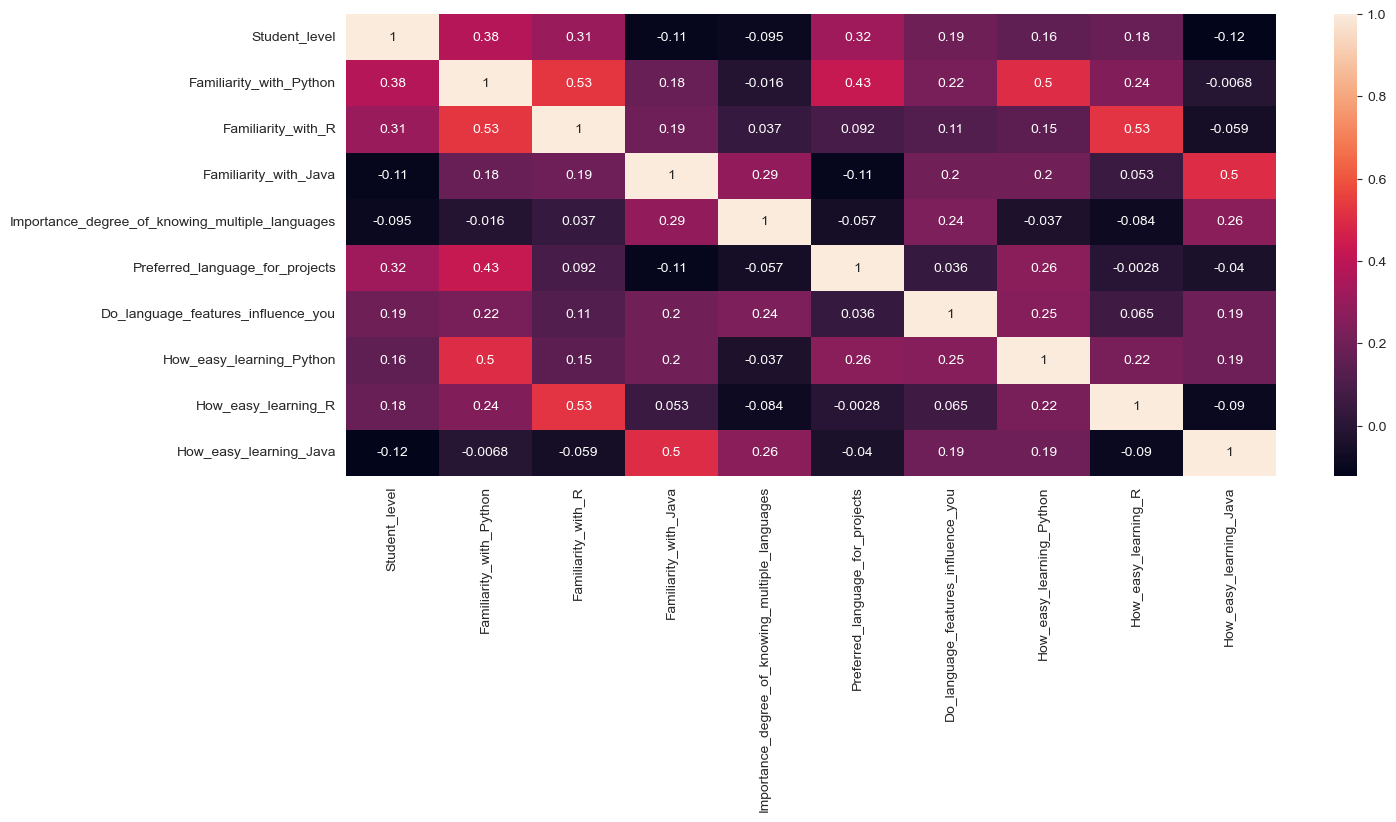

In [62]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True);

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Create the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(f"Accuracy Score on Training Data: {accuracy_score(y_train, model.predict(X_train))*100:.2f}%")
print(f"R-squared score Training Data: {model.score(X_train, y_train)*100:.2f}%")


print(f"Accuracy Score on Test Data: {accuracy_score(y_test, y_pred)*100:.2f}%")

# Calculate the R-squared score
r2 = model.score(X_test, y_test)

print(f"R-squared score Test Data: {r2*100:.2f}%")

Accuracy Score on Training Data: 98.39%
R-squared score Training Data: 98.39%
Accuracy Score on Test Data: 65.62%
R-squared score Test Data: 65.62%


In [64]:

from scipy.stats import chi2_contingency,chisquare

# Extract the numeric column of interest
column_of_interest = df['Familiarity_with_Python']

# Create a contingency table
observed_values = pd.crosstab(column_of_interest, columns='count')

# Perform chi-square test
chi2, p_value = chisquare(observed_values)

# Print the results
print("Chi-square statistic:", chi2)
p_value[0]

Chi-square statistic: [31.05128205]


2.988533230184915e-06

# Hypothesis test 

In [65]:
ordinal_values = df['Preferred_language_for_projects']

In [66]:
U, p_value = mannwhitneyu(ordinal_values, y=1.0)

In [67]:
alpha = 0.05
print("p_value =" , p_value)
# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis, Python is the most preferred language")
else:
    print("Don't reject the null hypothesis, Anthor language is the most preferred for prohects ")

p_value = 0.12725204269264612
Don't reject the null hypothesis, Anthor language is the most preferred for prohects 


> **Correlation between student age and preferred language for projects**

In [68]:
student_age = df["Student_age"]
preferred_language = df["Preferred_language_for_projects"]

In [69]:
contingency_table = pd.crosstab(index=student_age, columns=preferred_language)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [70]:
alpha = 0.05
print("p_value =" , p_value)
if p_value < alpha:
    print("Reject the null hypothesis, There is a correlation between student age and preferred language")
else:
    print("Don't reject the null hypothesis, There is no correlation between student age and preferred language.")

p_value = 0.01838495809571184
Reject the null hypothesis, There is a correlation between student age and preferred language


> **Correlation between student gender and preferred language for projects**

In [71]:
student_gender = df["Student_gender"]
preferred_language = df["Preferred_language_for_projects"]

In [72]:
contingency_table = pd.crosstab(index=student_gender, columns=preferred_language)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [73]:
# Set the significance level
alpha = 0.05
print(p_value)
# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a correlation between student gender and preferred language.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation between student gender and preferred language.")

0.9594205872252283
Don't reject the null hypothesis. There is no significant correlation between student gender and preferred language.


In [74]:
student_level = df["Student_level"]
preferred_language = df["Preferred_language_for_projects"]

In [75]:
contingency_table = pd.crosstab(index=student_level, columns=preferred_language)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [76]:
# Set the significance level
alpha = 0.05
print(p_value)# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a correlation between student level and preferred language.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation between student level and preferred language.")

0.00024492193760948874
Reject the null hypothesis. There is a correlation between student level and preferred language.


In [77]:
familarity_with_python = df["Familiarity_with_Python"]
preferred_language = df["Preferred_language_for_projects"]

In [78]:
contingency_table = pd.crosstab(index=familarity_with_python, columns=preferred_language)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [79]:
# Set the significance level
alpha = 0.05
# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a correlation between familiarity and preferred language using python.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation between familiarity and preferred language using python.")

Reject the null hypothesis. There is a correlation between familiarity and preferred language using python.


In [80]:
familarity_with_R = df["Familiarity_with_R"]
preferred_language = df["Preferred_language_for_projects"]

In [81]:
contingency_table = pd.crosstab(index=familarity_with_R, columns=preferred_language)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [82]:
# Set the significance level
alpha = 0.05
# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a correlation between familiarity and preferred language using R.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation between familiarity and preferred language using R.")

Don't reject the null hypothesis. There is no significant correlation between familiarity and preferred language using R.


In [83]:
Familiarity_with_Java = df["Familiarity_with_Java"]
preferred_language = df["Preferred_language_for_projects"]

In [84]:
contingency_table = pd.crosstab(index=Familiarity_with_Java, columns=preferred_language)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [85]:
# Set the significance level
alpha = 0.05
# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a correlation between familiarity and preferred language using Java.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation between familiarity and preferred language using Java.")

Don't reject the null hypothesis. There is no significant correlation between familiarity and preferred language using Java.
